In [1]:
import pickle
years=['2014','2015','2016','2017']
f='89H'
f2='89V'
# f2='36'
loc = '/Users/mdattler/Desktop/Large_Data_Files/All_AMSR_Data/AMSR_DATA_PICKLE/'

tb89H = pickle.load(open(loc+'2017'+'_amsr_data'+f+'.p', "rb" ))
tb89V = pickle.load(open(loc+'2017'+'_amsr_data'+f2+'.p', "rb" ))




In [177]:
from netCDF4 import Dataset

water=Dataset('/Users/mdattler/Desktop/Large_Data_Files/FirnData/water.nc')
water_bounds = Dataset('/Users/mdattler/Desktop/Large_Data_Files/FirnData/water_bounds.nc')


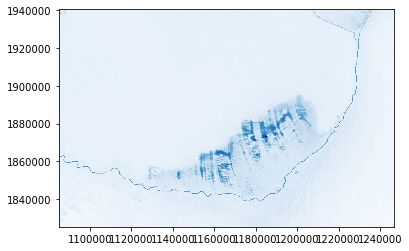

In [8]:
coordinates=pickle.load(open(loc+'geolocations.p', "rb" ))

In [10]:
from pyproj import Proj, transform
coordinates['X12']
inProj = Proj(init='epsg:4326') 
outProj = Proj(init='epsg:3412')
lat = -75.1152
lon = 123.0792

# AMERY ICE SHELF MELT
lat=-71.6960
lon=69.1233

lat1=-71.6938
lon1=69.3840

# Random ice shelf (?)

lat = -69.8287
lon = 32.2482

# x_amsr,y_amsr = transform(inProj,outProj,-170,-81)
x_amsrgood,y_amsrgood = transform(inProj,outProj,lon,lat)
x_amsr1,y_amsr1 = transform(inProj,outProj,lon1,lat1)

# x_amsr,y_amsr = transform(inProj,outProj,-62.088501062835505,-66.15655402424466)
#getting nearby index
yind=np.argmin(np.abs(coordinates['X6'][0,:]-x_amsrgood))
xind=np.argmin(np.abs(coordinates['Y6'][:,0]-y_amsrgood))


yind1=np.argmin(np.abs(coordinates['X6'][0,:]-x_amsr1))
xind1=np.argmin(np.abs(coordinates['Y6'][:,0]-y_amsr1))


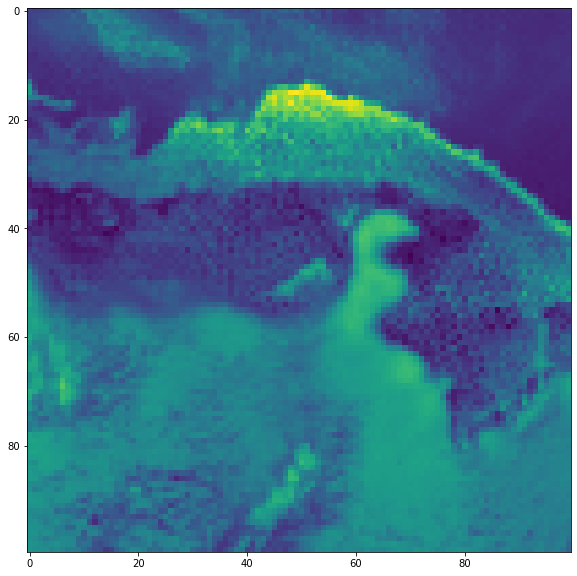

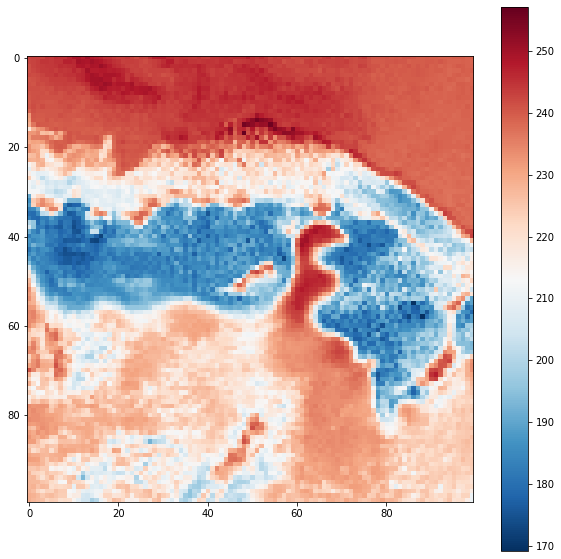

In [361]:
plt.figure(figsize=(10,10))
plt.imshow(tb89H['TB_89H'][xind-50:xind+50,yind-50:yind+50,21])

plt.figure(figsize=(10,10))
plt.imshow(tb89V['TB_89V'][xind-50:xind+50,yind-50:yind+50,21],cmap='RdBu_r')
plt.colorbar()


In [252]:
firndata['x'][0]

masked_array(data=-2425000.,
             mask=False,
       fill_value=1e+20)

In [254]:
x_amsr[0]

-4975102.708712774

In [5]:
import scipy.io as sio
from netCDF4 import Dataset
import pickle
from scipy.interpolate import RegularGridInterpolator
import numpy as np
from pyproj import Proj, transform

firndata = Dataset('/Users/mdattler/Desktop/Large_Data_Files/FirnData/GSFC_FDM_rho_temp_2017.nc')


from mpl_toolkits.basemap import Basemap

local_tbh = np.zeros((365,len(firndata['x'])))*np.nan
# local_tbv = np.zeros((365,len(firndata['x'])))*np.nan

x='X6'
y='Y6'

    
w = 3950*1000*2
h = 3950*1000*2
inProj = Proj(init='epsg:4326') 

m = Basemap(width=w,height=h,projection='stere',\
            lat_ts=-71,lat_0=-90,lon_0=-0.0015,rsphere=6378388,)


lons,lats = m(np.asarray(firndata['x'])+w/2,np.asarray(firndata['y'])+w/2,inverse=True)
blah=Proj(proj='stere', a=6378388,es=0.0819919, lat_0=-90., lat_ts=-71, lon_0=-0.0015, x_0=0, y_0=0)

lons,lats = transform(blah,inProj,np.asarray(firndata['x']),np.asarray(firndata['y']))


outProj = Proj(init='epsg:3412')
x_amsr,y_amsr = transform(inProj,outProj,latandlon['lon'],latandlon['lat'])

# x_amsr,y_amsr = transform(Proj(init='epsg:3412'),Proj(init='epsg:6933'),np.asarray(firndata['x']),np.asarray(firndata['y']))

# for date in np.arange(0,365):
#     itph = RegularGridInterpolator((np.asarray(coordinates[x])[0,:], np.asarray(coordinates[y])[::-1,0]), np.asarray(tb89H['TB_89H'])[::-1,:,date].T, method='linear') 
#     resh = itph((x_amsr,y_amsr))
#     local_tbh[date,:] = resh 

(1800000, 2000000)

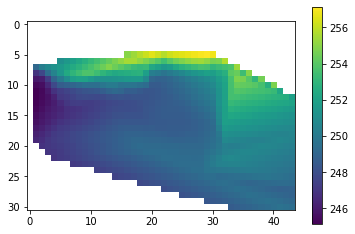

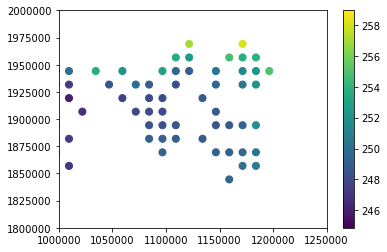

In [367]:
plt.imshow(grid_z0)
plt.colorbar()
plt.figure()
plt.scatter(x_amsr[good][z_old>0],y_amsr[good][z_old>0],s=50,c=z_old[z_old>0])
plt.colorbar()
plt.xlim([1000000,1250000])
plt.ylim([1800000,2000000])

In [376]:
x_amsr

array([[-2417794.71789437],
       [-2405331.8586059 ],
       [-2392868.99885953],
       ...,
       [ 2716903.34126355],
       [ 2729366.20197023],
       [ 2729366.20184682]])

In [401]:
np.where(good==True)

(array([4631, 4632, 4633, 4634, 4635, 4636, 4638, 4639, 4640, 4641, 4642,
        4643, 4644, 4645, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655,
        4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4666, 4667, 4668,
        4673, 4674, 4675, 4680, 4681, 4682, 4687, 4688, 4689, 4694, 4695,
        4696, 4697, 4698, 4699, 4701, 4702, 4703, 4704, 4705, 4706, 4707,
        4711, 4712, 4713, 4714, 4715, 4716, 4717, 4720, 4721, 4722, 4723,
        4724, 4725, 4726, 4727, 4728, 4729, 4730, 4731, 4732, 4733, 4734,
        4735, 4736, 4737, 4738, 4739, 4740, 4741, 4742, 4743, 4744, 4745,
        4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755, 4756,
        4757, 4758, 4759, 4760, 4761, 4762, 4763, 4764, 4765, 4767, 4768,
        4769, 4770]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0,

# Interpolating CFM Data down

In [407]:
24./5.

4.8

In [406]:
firndata['temperature'][:,:,4633].shape

(73, 351)

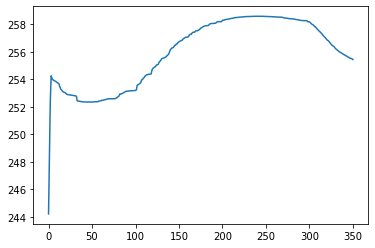

In [405]:
plt.plot(firndata['temperature'][24,:,4633])

In [16]:
firndata['temperature'].shape

(73, 351, 5414)

In [36]:
from scipy.interpolate import griddata

xmin=21
xmax=10

ymin=31
ymax=13

new_x = coordinates['X6'][xind-xmin:xind+xmax,yind-ymin:yind+ymax]
new_y = coordinates['Y6'][xind-xmin:xind+xmax,yind-ymin:yind+ymax]


new_z = tb89H['TB_89H'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,21]
z=firndata['temperature'][:,::7,:].shape[1]
depths = np.arange(0,z)

x = 4

good = ((x_amsr>950000) & (x_amsr<1250000) & \
        (y_amsr>1800000) & (y_amsr<2000000))

good = np.squeeze(good)

temp_interp = np.zeros((new_x.shape[0],new_x.shape[1],z))*np.nan
dens_interp = np.zeros((new_x.shape[0],new_x.shape[1],z))*np.nan


for depth in depths:

    x_old = np.squeeze(x_amsr[good])
    y_old = np.squeeze(y_amsr[good])
    temp_old = np.squeeze(np.asarray(firndata['temperature'])[x,depth*7,np.squeeze(good)])
    dens_old = np.squeeze(np.asarray(firndata['density'])[x,depth*7,np.squeeze(good)])
    
    temp_interp[:,:,depth] = griddata((x_old[temp_old>0],y_old[temp_old>0]), temp_old[temp_old>0], (new_x, new_y), method='nearest')
    dens_interp[:,:,depth] = griddata((x_old[dens_old>0],y_old[dens_old>0]), dens_old[dens_old>0], (new_x, new_y), method='nearest')
    


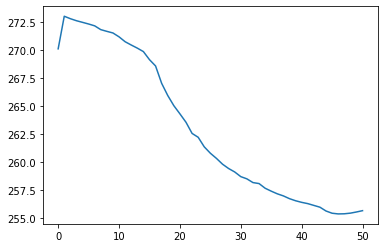

In [20]:
import matplotlib.pyplot as plt
plt.plot(temp_interp[15,10,:])

(1815000, 1950000)

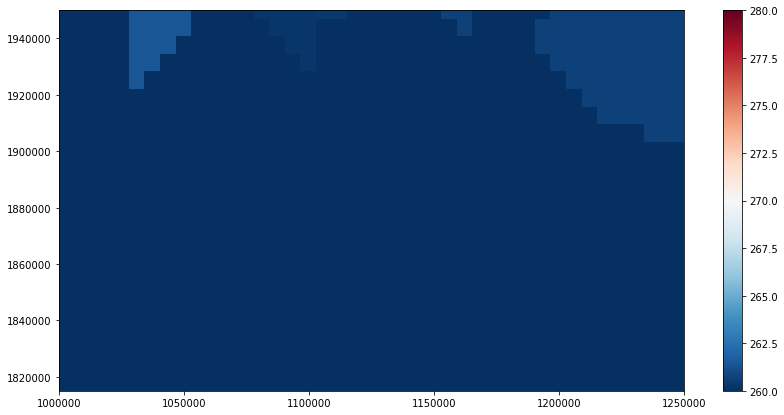

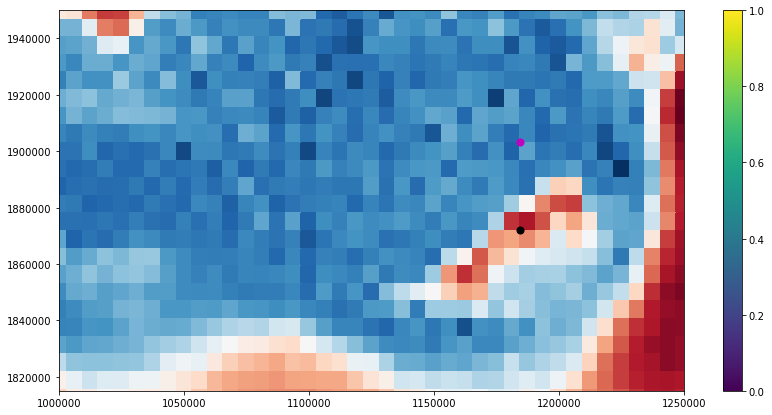

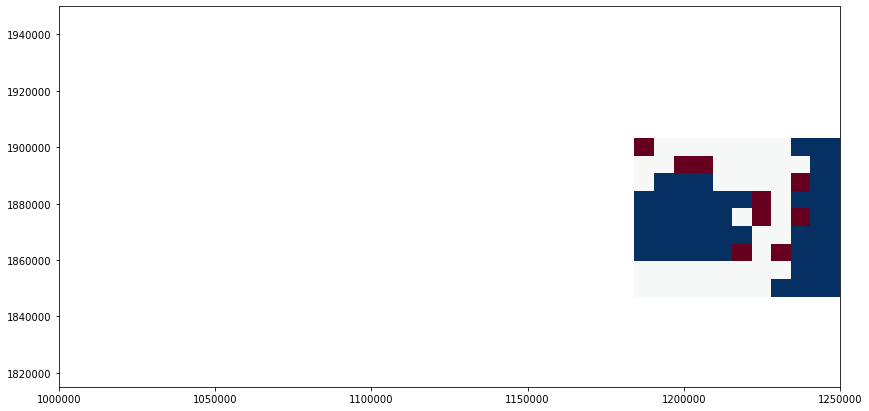

In [66]:
plt.figure(figsize=(14,7))
# plt.scatter(x_amsr,y_amsr,c=np.arange(0,len(x_amsr)))
# plt.colorbar()
# plt.figure()
good = ((x_amsr>950000) & (x_amsr<1250000) & \
        (y_amsr>1800000) & (y_amsr<2000000))


x_old = x_amsr[good]
y_old = y_amsr[good]
z_old = np.asarray(firndata['temperature'])[24,0,np.squeeze(good)]

from scipy import interpolate


grid_z0 = griddata((x_old[z_old>0],y_old[z_old>0]), z_old[z_old>0], (new_x, new_y), method='nearest')
plt.xlim([1000000,1250000])
plt.ylim([1815000,1950000])

plt.pcolor(new_x,new_y,temp_interp[:,:,50],vmax=280,vmin=260,cmap='RdBu_r')
plt.colorbar()
# plt.scatter(x_amsr[good][z_old>0],y_amsr[good][z_old>0],s=50,c='k',vmax=260,vmin=245,cmap='RdBu_r')


plt.figure(figsize=(14,7))
redo1=np.arange(xind-50,xind+50)
redo2=np.arange(yind-50,yind+50)





plt.pcolor(coordinates['X6'][xind-xmin:xind+xmax,yind-ymin:yind+ymax],coordinates['Y6'][xind-xmin:xind+xmax,yind-ymin:yind+ymax],tb89V['TB_89V'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,21],cmap='RdBu_r')
# plt.scatter(x_amsr[good],y_amsr[good],c='k',s=50)
plt.scatter(new_x[20,32],new_y[20,32],c='k',s=50)
plt.scatter(new_x[15,32],new_y[15,20],c='m',s=50)


plt.colorbar()


plt.xlim([1000000,1250000])
plt.ylim([1815000,1950000])
            #local_tbh[24,:]
    
    
plt.figure(figsize=(14,7))

plt.pcolor(new_x,new_y,best_depth,cmap='RdBu')

plt.xlim([1000000,1250000])
plt.ylim([1815000,1950000])

In [69]:
from smrt import make_snowpack, make_model, sensor_list, water_parameters, make_ice_column


def grab_thicknesses(xvalue):
    in_between = (xvalue[1:] + xvalue[:-1]) / 2
    seperators = np.append(arr = np.array([0.]), values = np.squeeze(in_between), axis= 0)
    full_seperators = np.append(arr = seperators, values = seperators[-5]+100.)
    thicknesses = np.diff(full_seperators)
    return thicknesses

vertical_skip = 7
thicknesses=grab_thicknesses(firndata['depth'][::vertical_skip])

water_depths = np.arange(0.0,0.3,0.01)

best_depth = np.zeros((dens_interp.shape[0],dens_interp.shape[1]))*np.nan


for x in np.arange(0,dens_interp.shape[0]):
    for y in np.arange(0,dens_interp.shape[1]):
        difference = water_depths * np.nan
        for ind,water_depth in enumerate(water_depths):
            
            density = dens_interp[x,y,:]
            temp = temp_interp[x,y,:]
            
            snowpack = make_snowpack(thicknesses, density = density, temperature = temp,
                                                 microstructure_model = 'exponential', corr_length = 0.004)
            if water_depth == 0.:
                medium = snowpack
            else:
                water_layer = make_ice_column(ice_type='firstyear',salinity=0.,temperature=273.15,microstructure_model='exponential',thickness=[water_depth],porosity=100,corr_length=0.005,add_water_substrate=False) 
                medium = water_layer + snowpack
    
            m = make_model("iba", "dort")
        
            sensorH = sensor_list.amsre('89H')
            resH = m.run(sensorH, medium)
            difference[ind] = resH.TbH()-new_z[x,y]
#             if (water_depth == 0.) & (difference[ind] > 0.):
#                 break
            
        print(difference)
        difference_idx = np.nanargmin(np.abs(difference))
        best_depth[x,y] = water_depths[difference_idx]
        print(best_depth[x,y])

import pickle

pickle.dump({'best_depth':best_depth},open('blah.p','wb'))



[-12.47128528 -18.91889196 -12.31661451  -7.38584199  -3.58533742
  -0.59676051   1.78525284   3.70191032   5.25480977   6.51949928
   7.5535431    8.4016133    9.09886336   9.6732541   10.14721083
  10.53883642  10.86281935  11.13112612  11.35353722  11.53806724
  11.69129756  11.81864185  11.92455957  12.01272845  12.08618456
  12.14743638  12.19855802  12.24126558  12.27697982  12.30687761]
0.05
[ -9.07128528 -15.51889196  -8.91661451  -3.98584199  -0.18533742
   2.80323949   5.18525284   7.10191032   8.65480977   9.91949928
  10.9535431   11.8016133   12.49886336  13.0732541   13.54721083
  13.93883642  14.26281935  14.53112612  14.75353722  14.93806724
  15.09129756  15.21864185  15.32455957  15.41272845  15.48618456
  15.54743638  15.59855802  15.64126558  15.67697982  15.70687761]
0.04
[-11.27128528 -17.71889196 -11.11661451  -6.18584199  -2.38533742
   0.60323949   2.98525284   4.90191032   6.45480977   7.71949928
   8.7535431    9.6016133   10.29886336  10.8732541   11.3472108

[-29.35493532 -16.61094122 -11.41826623  -7.51660221  -4.49965477
  -2.12284047  -0.22628757   1.30080473   2.53856219   3.54677311
   4.37110795   5.04707628   5.6026632    6.06015451   6.4374412
   6.74897692   7.00649629   7.21956373   7.39599899   7.54221128
   7.66346413   7.7640872    7.84764659   7.9170827    7.97482223
   8.02286939   8.06288062   8.09622568   8.12403787   8.1472553 ]
0.06
[-29.75493532 -17.01094122 -11.81826623  -7.91660221  -4.89965477
  -2.52284047  -0.62628757   0.90080473   2.13856219   3.14677311
   3.97110795   4.64707628   5.2026632    5.66015451   6.0374412
   6.34897692   6.60649629   6.81956373   6.99599899   7.14221128
   7.26346413   7.3640872    7.44764659   7.5170827    7.57482223
   7.62286939   7.66288062   7.69622568   7.72403787   7.7472553 ]
0.06
[-29.25493532 -16.51094122 -11.31826623  -7.41660221  -4.39965477
  -2.02284047  -0.12628757   1.40080473   2.63856219   3.64677311
   4.47110795   5.14707628   5.7026632    6.16015451   6.5374412
 

[ -9.64104801 -31.18933041 -22.71905326 -16.50456176 -11.77093827
  -8.08099598  -5.1598596   -2.82214354  -0.93653325   0.59336228
   1.84020402   2.85987908   3.69604244   4.383205     4.94890529
   5.41528022   5.80022828   6.11828792   6.38131188   6.59899183
   6.7792712    6.92867303   7.05256231   7.15535725   7.24070015
   7.31159632   7.37052734   7.41954362   7.46034027   7.49431932]
0.09
[-12.84104801 -34.38933041 -25.91905326 -19.70456176 -14.97093827
 -11.28099598  -8.3598596   -6.02214354  -4.13653325  -2.60663772
  -1.35979598  -0.34012092   0.49604244   1.183205     1.74890529
   2.21528022   2.60022828   2.91828792   3.18131188   3.39899183
   3.5792712    3.72867303   3.85256231   3.95535725   4.04070015
   4.11159632   4.17052734   4.21954362   4.26034027   4.29431932]
0.11
[ -9.74104801 -31.28933041 -22.81905326 -16.60456176 -11.87093827
  -8.18099598  -5.2598596   -2.92214354  -1.03653325   0.49336228
   1.74020402   2.75987908   3.59604244   4.283205     4.8489052

[-26.25493532 -13.51094122  -8.31826623  -4.41660221  -1.39965477
   0.97715953   2.87371243   4.40080473   5.63856219   6.64677311
   7.47110795   8.14707628   8.7026632    9.16015451   9.5374412
   9.84897692  10.10649629  10.31956373  10.49599899  10.64221128
  10.76346413  10.8640872   10.94764659  11.0170827   11.07482223
  11.12286939  11.16288062  11.19622568  11.22403787  11.2472553 ]
0.05
[-26.05493532 -13.31094122  -8.11826623  -4.21660221  -1.19965477
   1.17715953   3.07371243   4.60080473   5.83856219   6.84677311
   7.67110795   8.34707628   8.9026632    9.36015451   9.7374412
  10.04897692  10.30649629  10.51956373  10.69599899  10.84221128
  10.96346413  11.0640872   11.14764659  11.2170827   11.27482223
  11.32286939  11.36288062  11.39622568  11.42403787  11.4472553 ]
0.05
[-3.37549353e+01 -2.10109412e+01 -1.58182662e+01 -1.19166022e+01
 -8.89965477e+00 -6.52284047e+00 -4.62628757e+00 -3.09919527e+00
 -1.86143781e+00 -8.53226887e-01 -2.88920519e-02  6.47076277e-01
  1

[ -9.21798542 -27.62799653 -21.06346698 -16.15623505 -12.37176067
  -9.39501502  -7.02236004  -5.11352411  -3.56743228  -2.30883529
  -1.28034309  -0.43738735   0.25512178   0.82510436   1.29495792
   1.6827647    2.00319648   2.2682051    2.48755744   2.66925503
   2.81986645   2.94479281   3.04848123   3.13459741   3.20616569
   3.26568322   3.31521325   3.3564615    3.39083885   3.41951287]
0.12
[ -7.81798542 -26.22799653 -19.66346698 -14.75623505 -10.97176067
  -7.99501502  -5.62236004  -3.71352411  -2.16743228  -0.90883529
   0.11965691   0.96261265   1.65512178   2.22510436   2.69495792
   3.0827647    3.40319648   3.6682051    3.88755744   4.06925503
   4.21986645   4.34479281   4.44848123   4.53459741   4.60616569
   4.66568322   4.71521325   4.7564615    4.79083885   4.81951287]
0.1
[-1.65410480e+01 -3.80893304e+01 -2.96190533e+01 -2.34045618e+01
 -1.86709383e+01 -1.49809960e+01 -1.20598596e+01 -9.72214354e+00
 -7.83653325e+00 -6.30663772e+00 -5.05979598e+00 -4.04012092e+00
 -

[-13.94039951  -6.60773337  -0.17215079   4.64651447   8.36676267
  11.29525943  13.63077952  15.51053673  17.03356823  18.27370348
  19.28730843  20.11819226  20.80086978  21.36281785  21.82608762
  22.2084876   22.52447133  22.78581537  23.002145    23.18134684
  23.32989586  23.45311667  23.55539375  23.64034135  23.71094153
  23.76965666  23.81852129  23.85921748  23.89313658  23.92143004]
0.02
[-20.94039951 -13.60773337  -7.17215079  -2.35348553   1.36676267
   4.29525943   6.63077952   8.51053673  10.03356823  11.27370348
  12.28730843  13.11819226  13.80086978  14.36281785  14.82608762
  15.2084876   15.52447133  15.78581537  16.002145    16.18134684
  16.32989586  16.45311667  16.55539375  16.64034135  16.71094153
  16.76965666  16.81852129  16.85921748  16.89313658  16.92143004]
0.04
[-26.54039951 -19.20773337 -12.77215079  -7.95348553  -4.23323733
  -1.30474057   1.03077952   2.91053673   4.43356823   5.67370348
   6.68730843   7.51819226   8.20086978   8.76281785   9.2260876

[ -0.71798542 -19.12799653 -12.56346698  -7.65623505  -3.87176067
  -0.89501502   1.47763996   3.38647589   4.93256772   6.19116471
   7.21965691   8.06261265   8.75512178   9.32510436   9.79495792
  10.1827647   10.50319648  10.7682051   10.98755744  11.16925503
  11.31986645  11.44479281  11.54848123  11.63459741  11.70616569
  11.76568322  11.81521325  11.8564615   11.89083885  11.91951287]
0.0
[ -6.41798542 -24.82799653 -18.26346698 -13.35623505  -9.57176067
  -6.59501502  -4.22236004  -2.31352411  -0.76743228   0.49116471
   1.51965691   2.36261265   3.05512178   3.62510436   4.09495792
   4.4827647    4.80319648   5.0682051    5.28755744   5.46925503
   5.61986645   5.74479281   5.84848123   5.93459741   6.00616569
   6.06568322   6.11521325   6.1564615    6.19083885   6.21951287]
0.09
[ -1.81798542 -20.22799653 -13.66346698  -8.75623505  -4.97176067
  -1.99501502   0.37763996   2.28647589   3.83256772   5.09116471
   6.11965691   6.96261265   7.65512178   8.22510436   8.69495792

[-9.02523522 -9.99981346 -3.9222825   0.64269197  4.17444048  6.95877524
  9.18195657 10.973051   12.42547847 13.6090315  14.57708428 15.37117705
 16.02407324 16.56187934 17.00556286 17.37206838 17.67515615 17.92604361
 18.13390336 18.30625436 18.4492723  18.56803776 18.66673596 18.74881833
 18.81713378 18.8740358  18.92146989 18.9610453  18.99409388 19.02171848]
0.03
[-6.02523522 -6.99981346 -0.9222825   3.64269197  7.17444048  9.95877524
 12.18195657 13.973051   15.42547847 16.6090315  17.57708428 18.37117705
 19.02407324 19.56187934 20.00556286 20.37206838 20.67515615 20.92604361
 21.13390336 21.30625436 21.4492723  21.56803776 21.66673596 21.74881833
 21.81713378 21.8740358  21.92146989 21.9610453  21.99409388 22.02171848]
0.02
[-21.74039951 -14.40773337  -7.97215079  -3.15348553   0.56676267
   3.49525943   5.83077952   7.71053673   9.23356823  10.47370348
  11.48730843  12.31819226  13.00086978  13.56281785  14.02608762
  14.4084876   14.72447133  14.98581537  15.202145    15.381

[10.78201458 -7.62799653 -1.06346698  3.84376495  7.62823933 10.60498498
 12.97763996 14.88647589 16.43256772 17.69116471 18.71965691 19.56261265
 20.25512178 20.82510436 21.29495792 21.6827647  22.00319648 22.2682051
 22.48755744 22.66925503 22.81986645 22.94479281 23.04848123 23.13459741
 23.20616569 23.26568322 23.31521325 23.3564615  23.39083885 23.41951287]
0.02
[13.58201458 -4.82799653  1.73653302  6.64376495 10.42823933 13.40498498
 15.77763996 17.68647589 19.23256772 20.49116471 21.51965691 22.36261265
 23.05512178 23.62510436 24.09495792 24.4827647  24.80319648 25.0682051
 25.28755744 25.46925503 25.61986645 25.74479281 25.84848123 25.93459741
 26.00616569 26.06568322 26.11521325 26.1564615  26.19083885 26.21951287]
0.02
[ 9.68201458 -8.72799653 -2.16346698  2.74376495  6.52823933  9.50498498
 11.87763996 13.78647589 15.33256772 16.59116471 17.61965691 18.46261265
 19.15512178 19.72510436 20.19495792 20.5827647  20.90319648 21.1682051
 21.38755744 21.56925503 21.71986645 21.84

[-11.32523522 -12.29981346  -6.2222825   -1.65730803   1.87444048
   4.65877524   6.88195657   8.673051    10.12547847  11.3090315
  12.27708428  13.07117705  13.72407324  14.26187934  14.70556286
  15.07206838  15.37515615  15.62604361  15.83390336  16.00625436
  16.1492723   16.26803776  16.36673596  16.44881833  16.51713378
  16.5740358   16.62146989  16.6610453   16.69409388  16.72171848]
0.03
[-3.42523522 -4.39981346  1.6777175   6.24269197  9.77444048 12.55877524
 14.78195657 16.573051   18.02547847 19.2090315  20.17708428 20.97117705
 21.62407324 22.16187934 22.60556286 22.97206838 23.27515615 23.52604361
 23.73390336 23.90625436 24.0492723  24.16803776 24.26673596 24.34881833
 24.41713378 24.4740358  24.52146989 24.5610453  24.59409388 24.62171848]
0.02
[-2.52523522 -3.49981346  2.5777175   7.14269197 10.67444048 13.45877524
 15.68195657 17.473051   18.92547847 20.1090315  21.07708428 21.87117705
 22.52407324 23.06187934 23.50556286 23.87206838 24.17515615 24.42604361
 24.63390

[18.18201458 -0.22799653  6.33653302 11.24376495 15.02823933 18.00498498
 20.37763996 22.28647589 23.83256772 25.09116471 26.11965691 26.96261265
 27.65512178 28.22510436 28.69495792 29.0827647  29.40319648 29.6682051
 29.88755744 30.06925503 30.21986645 30.34479281 30.44848123 30.53459741
 30.60616569 30.66568322 30.71521325 30.7564615  30.79083885 30.81951287]
0.01
[15.98201458 -2.42799653  4.13653302  9.04376495 12.82823933 15.80498498
 18.17763996 20.08647589 21.63256772 22.89116471 23.91965691 24.76261265
 25.45512178 26.02510436 26.49495792 26.8827647  27.20319648 27.4682051
 27.68755744 27.86925503 28.01986645 28.14479281 28.24848123 28.33459741
 28.40616569 28.46568322 28.51521325 28.5564615  28.59083885 28.61951287]
0.01
[19.08201458  0.67200347  7.23653302 12.14376495 15.92823933 18.90498498
 21.27763996 23.18647589 24.73256772 25.99116471 27.01965691 27.86261265
 28.55512178 29.12510436 29.59495792 29.9827647  30.30319648 30.5682051
 30.78755744 30.96925503 31.11986645 31.24

[ 5.67476478  4.70018654 10.7777175  15.34269197 18.87444048 21.65877524
 23.88195657 25.673051   27.12547847 28.3090315  29.27708428 30.07117705
 30.72407324 31.26187934 31.70556286 32.07206838 32.37515615 32.62604361
 32.83390336 33.00625436 33.1492723  33.26803776 33.36673596 33.44881833
 33.51713378 33.5740358  33.62146989 33.6610453  33.69409388 33.72171848]
0.01
[ 5.67476478  4.70018654 10.7777175  15.34269197 18.87444048 21.65877524
 23.88195657 25.673051   27.12547847 28.3090315  29.27708428 30.07117705
 30.72407324 31.26187934 31.70556286 32.07206838 32.37515615 32.62604361
 32.83390336 33.00625436 33.1492723  33.26803776 33.36673596 33.44881833
 33.51713378 33.5740358  33.62146989 33.6610453  33.69409388 33.72171848]
0.01
[ 8.07476478  7.10018654 13.1777175  17.74269197 21.27444048 24.05877524
 26.28195657 28.073051   29.52547847 30.7090315  31.67708428 32.47117705
 33.12407324 33.66187934 34.10556286 34.47206838 34.77515615 35.02604361
 35.23390336 35.40625436 35.5492723  35

[17.98201458 -0.42799653  6.13653302 11.04376495 14.82823933 17.80498498
 20.17763996 22.08647589 23.63256772 24.89116471 25.91965691 26.76261265
 27.45512178 28.02510436 28.49495792 28.8827647  29.20319648 29.4682051
 29.68755744 29.86925503 30.01986645 30.14479281 30.24848123 30.33459741
 30.40616569 30.46568322 30.51521325 30.5564615  30.59083885 30.61951287]
0.01
[20.48201458  2.07200347  8.63653302 13.54376495 17.32823933 20.30498498
 22.67763996 24.58647589 26.13256772 27.39116471 28.41965691 29.26261265
 29.95512178 30.52510436 30.99495792 31.3827647  31.70319648 31.9682051
 32.18755744 32.36925503 32.51986645 32.64479281 32.74848123 32.83459741
 32.90616569 32.96568322 33.01521325 33.0564615  33.09083885 33.11951287]
0.01
[20.08201458  1.67200347  8.23653302 13.14376495 16.92823933 19.90498498
 22.27763996 24.18647589 25.73256772 26.99116471 28.01965691 28.86261265
 29.55512178 30.12510436 30.59495792 30.9827647  31.30319648 31.5682051
 31.78755744 31.96925503 32.11986645 32.24

[ 2.67476478  1.70018654  7.7777175  12.34269197 15.87444048 18.65877524
 20.88195657 22.673051   24.12547847 25.3090315  26.27708428 27.07117705
 27.72407324 28.26187934 28.70556286 29.07206838 29.37515615 29.62604361
 29.83390336 30.00625436 30.1492723  30.26803776 30.36673596 30.44881833
 30.51713378 30.5740358  30.62146989 30.6610453  30.69409388 30.72171848]
0.01
[10.47476478  9.50018654 15.5777175  20.14269197 23.67444048 26.45877524
 28.68195657 30.473051   31.92547847 33.1090315  34.07708428 34.87117705
 35.52407324 36.06187934 36.50556286 36.87206838 37.17515615 37.42604361
 37.63390336 37.80625436 37.9492723  38.06803776 38.16673596 38.24881833
 38.31713378 38.3740358  38.42146989 38.4610453  38.49409388 38.52171848]
0.01
[ 5.37476478  4.40018654 10.4777175  15.04269197 18.57444048 21.35877524
 23.58195657 25.373051   26.82547847 28.0090315  28.97708428 29.77117705
 30.42407324 30.96187934 31.40556286 31.77206838 32.07515615 32.32604361
 32.53390336 32.70625436 32.8492723  32

[20.38201458  1.97200347  8.53653302 13.44376495 17.22823933 20.20498498
 22.57763996 24.48647589 26.03256772 27.29116471 28.31965691 29.16261265
 29.85512178 30.42510436 30.89495792 31.2827647  31.60319648 31.8682051
 32.08755744 32.26925503 32.41986645 32.54479281 32.64848123 32.73459741
 32.80616569 32.86568322 32.91521325 32.9564615  32.99083885 33.01951287]
0.01
[16.38201458 -2.02799653  4.53653302  9.44376495 13.22823933 16.20498498
 18.57763996 20.48647589 22.03256772 23.29116471 24.31965691 25.16261265
 25.85512178 26.42510436 26.89495792 27.2827647  27.60319648 27.8682051
 28.08755744 28.26925503 28.41986645 28.54479281 28.64848123 28.73459741
 28.80616569 28.86568322 28.91521325 28.9564615  28.99083885 29.01951287]
0.01
[20.95895199 -0.58933041  7.88094674 14.09543824 18.82906173 22.51900402
 25.4401404  27.77785646 29.66346675 31.19336228 32.44020402 33.45987908
 34.29604244 34.983205   35.54890529 36.01528022 36.40022828 36.71828792
 36.98131188 37.19899183 37.3792712  37.5

[ 5.77476478  4.80018654 10.8777175  15.44269197 18.97444048 21.75877524
 23.98195657 25.773051   27.22547847 28.4090315  29.37708428 30.17117705
 30.82407324 31.36187934 31.80556286 32.17206838 32.47515615 32.72604361
 32.93390336 33.10625436 33.2492723  33.36803776 33.46673596 33.54881833
 33.61713378 33.6740358  33.72146989 33.7610453  33.79409388 33.82171848]
0.01
[ 4.97476478  4.00018654 10.0777175  14.64269197 18.17444048 20.95877524
 23.18195657 24.973051   26.42547847 27.6090315  28.57708428 29.37117705
 30.02407324 30.56187934 31.00556286 31.37206838 31.67515615 31.92604361
 32.13390336 32.30625436 32.4492723  32.56803776 32.66673596 32.74881833
 32.81713378 32.8740358  32.92146989 32.9610453  32.99409388 33.02171848]
0.01
[ 3.27476478  2.30018654  8.3777175  12.94269197 16.47444048 19.25877524
 21.48195657 23.273051   24.72547847 25.9090315  26.87708428 27.67117705
 28.32407324 28.86187934 29.30556286 29.67206838 29.97515615 30.22604361
 30.43390336 30.60625436 30.7492723  30

[11.75895199 -9.78933041 -1.31905326  4.89543824  9.62906173 13.31900402
 16.2401404  18.57785646 20.46346675 21.99336228 23.24020402 24.25987908
 25.09604244 25.783205   26.34890529 26.81528022 27.20022828 27.51828792
 27.78131188 27.99899183 28.1792712  28.32867303 28.45256231 28.55535725
 28.64070015 28.71159632 28.77052734 28.81954362 28.86034027 28.89431932]
0.02
[12.25895199 -9.28933041 -0.81905326  5.39543824 10.12906173 13.81900402
 16.7401404  19.07785646 20.96346675 22.49336228 23.74020402 24.75987908
 25.59604244 26.283205   26.84890529 27.31528022 27.70022828 28.01828792
 28.28131188 28.49899183 28.6792712  28.82867303 28.95256231 29.05535725
 29.14070015 29.21159632 29.27052734 29.31954362 29.36034027 29.39431932]
0.02
[13.25895199 -8.28933041  0.18094674  6.39543824 11.12906173 14.81900402
 17.7401404  20.07785646 21.96346675 23.49336228 24.74020402 25.75987908
 26.59604244 27.283205   27.84890529 28.31528022 28.70022828 29.01828792
 29.28131188 29.49899183 29.6792712  29

[ 4.67476478  3.70018654  9.7777175  14.34269197 17.87444048 20.65877524
 22.88195657 24.673051   26.12547847 27.3090315  28.27708428 29.07117705
 29.72407324 30.26187934 30.70556286 31.07206838 31.37515615 31.62604361
 31.83390336 32.00625436 32.1492723  32.26803776 32.36673596 32.44881833
 32.51713378 32.5740358  32.62146989 32.6610453  32.69409388 32.72171848]
0.01
[ 1.37476478  0.40018654  6.4777175  11.04269197 14.57444048 17.35877524
 19.58195657 21.373051   22.82547847 24.0090315  24.97708428 25.77117705
 26.42407324 26.96187934 27.40556286 27.77206838 28.07515615 28.32604361
 28.53390336 28.70625436 28.8492723  28.96803776 29.06673596 29.14881833
 29.21713378 29.2740358  29.32146989 29.3610453  29.39409388 29.42171848]
0.01
[ 1.67476478  0.70018654  6.7777175  11.34269197 14.87444048 17.65877524
 19.88195657 21.673051   23.12547847 24.3090315  25.27708428 26.07117705
 26.72407324 27.26187934 27.70556286 28.07206838 28.37515615 28.62604361
 28.83390336 29.00625436 29.1492723  29

[13.95895199 -7.58933041  0.88094674  7.09543824 11.82906173 15.51900402
 18.4401404  20.77785646 22.66346675 24.19336228 25.44020402 26.45987908
 27.29604244 27.983205   28.54890529 29.01528022 29.40022828 29.71828792
 29.98131188 30.19899183 30.3792712  30.52867303 30.65256231 30.75535725
 30.84070015 30.91159632 30.97052734 31.01954362 31.06034027 31.09431932]
0.02
[ 10.35895199 -11.18933041  -2.71905326   3.49543824   8.22906173
  11.91900402  14.8401404   17.17785646  19.06346675  20.59336228
  21.84020402  22.85987908  23.69604244  24.383205    24.94890529
  25.41528022  25.80022828  26.11828792  26.38131188  26.59899183
  26.7792712   26.92867303  27.05256231  27.15535725  27.24070015
  27.31159632  27.37052734  27.41954362  27.46034027  27.49431932]
0.02
[  1.15895199 -20.38933041 -11.91905326  -5.70456176  -0.97093827
   2.71900402   5.6401404    7.97785646   9.86346675  11.39336228
  12.64020402  13.65987908  14.49604244  15.183205    15.74890529
  16.21528022  16.60022828  1

[ 5.87476478  4.90018654 10.9777175  15.54269197 19.07444048 21.85877524
 24.08195657 25.873051   27.32547847 28.5090315  29.47708428 30.27117705
 30.92407324 31.46187934 31.90556286 32.27206838 32.57515615 32.82604361
 33.03390336 33.20625436 33.3492723  33.46803776 33.56673596 33.64881833
 33.71713378 33.7740358  33.82146989 33.8610453  33.89409388 33.92171848]
0.01
[25.06435355 -2.72894547  3.44951627  8.0834011  11.66499471 14.48685625
 16.73912152 18.55325118 20.02423012 21.22292078 22.20345616 23.00793101
 23.66952423 24.21466015 24.66455365 25.03634466 25.34394956 25.59871188
 25.8099069  25.98513783 26.13064991 26.25158146 26.35216584 26.4358948
 26.50565118 26.56381704 26.61236211 26.65291618 26.6868286  26.71521713]
0.01
[ 0.9218953   2.91695749  8.67121532 12.99403742 16.3381197  18.97432843
 21.07931165 22.77543002 24.15118581 25.27264798 26.19031036 26.94345151
 27.56303981 28.07374567 28.49538081 28.84395532 29.13247124 29.37152916
 29.56979879 29.73438844 29.87113813 29.

[12.85895199 -8.68933041 -0.21905326  5.99543824 10.72906173 14.41900402
 17.3401404  19.67785646 21.56346675 23.09336228 24.34020402 25.35987908
 26.19604244 26.883205   27.44890529 27.91528022 28.30022828 28.61828792
 28.88131188 29.09899183 29.2792712  29.42867303 29.55256231 29.65535725
 29.74070015 29.81159632 29.87052734 29.91954362 29.96034027 29.99431932]
0.02
[  2.65895199 -18.88933041 -10.41905326  -4.20456176   0.52906173
   4.21900402   7.1401404    9.47785646  11.36346675  12.89336228
  14.14020402  15.15987908  15.99604244  16.683205    17.24890529
  17.71528022  18.10022828  18.41828792  18.68131188  18.89899183
  19.0792712   19.22867303  19.35256231  19.45535725  19.54070015
  19.61159632  19.67052734  19.71954362  19.76034027  19.79431932]
0.04
[-6.84104801e+00 -2.83893304e+01 -1.99190533e+01 -1.37045618e+01
 -8.97093827e+00 -5.28099598e+00 -2.35985960e+00 -2.21435354e-02
  1.86346675e+00  3.39336228e+00  4.64020402e+00  5.65987908e+00
  6.49604244e+00  7.18320500e+00

[34.26435355  6.47105453 12.64951627 17.2834011  20.86499471 23.68685625
 25.93912152 27.75325118 29.22423012 30.42292078 31.40345616 32.20793101
 32.86952423 33.41466015 33.86455365 34.23634466 34.54394956 34.79871188
 35.0099069  35.18513783 35.33064991 35.45158146 35.55216584 35.6358948
 35.70565118 35.76381704 35.81236211 35.85291618 35.8868286  35.91521713]
0.01
[-1.4781047   0.51695749  6.27121532 10.59403742 13.9381197  16.57432843
 18.67931165 20.37543002 21.75118581 22.87264798 23.79031036 24.54345151
 25.16303981 25.67374567 26.09538081 26.44395532 26.73247124 26.97152916
 27.16979879 27.33438844 27.47113813 27.58485379 27.67949582 27.75833153
 27.8240591  27.87890858 27.92472442 27.96303322 27.99509922 28.02197005]
0.01
[-2.1781047  -0.18304251  5.57121532  9.89403742 13.2381197  15.87432843
 17.97931165 19.67543002 21.05118581 22.17264798 23.09031036 23.84345151
 24.46303981 24.97374567 25.39538081 25.74395532 26.03247124 26.27152916
 26.46979879 26.63438844 26.77113813 26.

[  8.55895199 -12.98933041  -4.51905326   1.69543824   6.42906173
  10.11900402  13.0401404   15.37785646  17.26346675  18.79336228
  20.04020402  21.05987908  21.89604244  22.583205    23.14890529
  23.61528022  24.00022828  24.31828792  24.58131188  24.79899183
  24.9792712   25.12867303  25.25256231  25.35535725  25.44070015
  25.51159632  25.57052734  25.61954362  25.66034027  25.69431932]
0.03
[ -6.14104801 -27.68933041 -19.21905326 -13.00456176  -8.27093827
  -4.58099598  -1.6598596    0.67785646   2.56346675   4.09336228
   5.34020402   6.35987908   7.19604244   7.883205     8.44890529
   8.91528022   9.30022828   9.61828792   9.88131188  10.09899183
  10.2792712   10.42867303  10.55256231  10.65535725  10.74070015
  10.81159632  10.87052734  10.91954362  10.96034027  10.99431932]
0.07
[-20.74104801 -42.28933041 -33.81905326 -27.60456176 -22.87093827
 -19.18099598 -16.2598596  -13.92214354 -12.03653325 -10.50663772
  -9.25979598  -8.24012092  -7.40395756  -6.716795    -6.1510947

[ 2.1218953   4.11695749  9.87121532 14.19403742 17.5381197  20.17432843
 22.27931165 23.97543002 25.35118581 26.47264798 27.39031036 28.14345151
 28.76303981 29.27374567 29.69538081 30.04395532 30.33247124 30.57152916
 30.76979879 30.93438844 31.07113813 31.18485379 31.27949582 31.35833153
 31.4240591  31.47890858 31.52472442 31.56303322 31.59509922 31.62197005]
0.0
[ 7.0218953   9.01695749 14.77121532 19.09403742 22.4381197  25.07432843
 27.17931165 28.87543002 30.25118581 31.37264798 32.29031036 33.04345151
 33.66303981 34.17374567 34.59538081 34.94395532 35.23247124 35.47152916
 35.66979879 35.83438844 35.97113813 36.08485379 36.17949582 36.25833153
 36.3240591  36.37890858 36.42472442 36.46303322 36.49509922 36.52197005]
0.0
[-8.6781047  -6.68304251 -0.92878468  3.39403742  6.7381197   9.37432843
 11.47931165 13.17543002 14.55118581 15.67264798 16.59031036 17.34345151
 17.96303981 18.47374567 18.89538081 19.24395532 19.53247124 19.77152916
 19.96979879 20.13438844 20.27113813 20.3

[  8.95895199 -12.58933041  -4.11905326   2.09543824   6.82906173
  10.51900402  13.4401404   15.77785646  17.66346675  19.19336228
  20.44020402  21.45987908  22.29604244  22.983205    23.54890529
  24.01528022  24.40022828  24.71828792  24.98131188  25.19899183
  25.3792712   25.52867303  25.65256231  25.75535725  25.84070015
  25.91159632  25.97052734  26.01954362  26.06034027  26.09431932]
0.03
[  0.15895199 -21.38933041 -12.91905326  -6.70456176  -1.97093827
   1.71900402   4.6401404    6.97785646   8.86346675  10.39336228
  11.64020402  12.65987908  13.49604244  14.183205    14.74890529
  15.21528022  15.60022828  15.91828792  16.18131188  16.39899183
  16.5792712   16.72867303  16.85256231  16.95535725  17.04070015
  17.11159632  17.17052734  17.21954362  17.26034027  17.29431932]
0.0
[  5.45895199 -16.08933041  -7.61905326  -1.40456176   3.32906173
   7.01900402   9.9401404   12.27785646  14.16346675  15.69336228
  16.94020402  17.95987908  18.79604244  19.483205    20.04890529

[-0.24100692 -2.29852746  5.51012056 11.28982073 15.71185707 19.16861175
 21.91081824 24.10905502 25.88479099 27.32751107 28.50484819 29.46892858
 30.2605369  30.9119595  31.44899031 31.8923854  32.25894242 32.56231734
 32.81365235 33.02206514 33.19503436 33.338706   33.45813885 33.55750224
 33.64023618 33.70918157 33.76668646 33.81469285 33.85480802 33.88836293]
0.0
[-2.30475425  7.33750755 12.30958165 16.08071015 19.01672352 21.34170925
 23.20434311 24.70895278 25.9317504  26.93006996 27.74799446 28.41997891
 28.9732912  29.42971921 29.80680195 30.11874043 30.37708557 30.5912669
 30.76900443 30.91663333 31.03936215 31.1414798  31.22652249 31.29740894
 31.35655044 31.4059407  31.44722927 31.48178193 31.51073013 31.53501174]
0.0
[-5.50475425  4.13750755  9.10958165 12.88071015 15.81672352 18.14170925
 20.00434311 21.50895278 22.7317504  23.73006996 24.54799446 25.21997891
 25.7732912  26.22971921 26.60680195 26.91874043 27.17708557 27.3912669
 27.56900443 27.71663333 27.83936215 27.941

[14.25895199 -7.28933041  1.18094674  7.39543824 12.12906173 15.81900402
 18.7401404  21.07785646 22.96346675 24.49336228 25.74020402 26.75987908
 27.59604244 28.283205   28.84890529 29.31528022 29.70022828 30.01828792
 30.28131188 30.49899183 30.6792712  30.82867303 30.95256231 31.05535725
 31.14070015 31.21159632 31.27052734 31.31954362 31.36034027 31.39431932]
0.02
[  0.25895199 -21.28933041 -12.81905326  -6.60456176  -1.87093827
   1.81900402   4.7401404    7.07785646   8.96346675  10.49336228
  11.74020402  12.75987908  13.59604244  14.283205    14.84890529
  15.31528022  15.70022828  16.01828792  16.28131188  16.49899183
  16.6792712   16.82867303  16.95256231  17.05535725  17.14070015
  17.21159632  17.27052734  17.31954362  17.36034027  17.39431932]
0.0
[-22.54104801 -44.08933041 -35.61905326 -29.40456176 -24.67093827
 -20.98099598 -18.0598596  -15.72214354 -13.83653325 -12.30663772
 -11.05979598 -10.04012092  -9.20395756  -8.516795    -7.95109471
  -7.48471978  -7.09977172  -6

[-2.10475425  7.53750755 12.50958165 16.28071015 19.21672352 21.54170925
 23.40434311 24.90895278 26.1317504  27.13006996 27.94799446 28.61997891
 29.1732912  29.62971921 30.00680195 30.31874043 30.57708557 30.7912669
 30.96900443 31.11663333 31.23936215 31.3414798  31.42652249 31.49740894
 31.55655044 31.6059407  31.64722927 31.68178193 31.71073013 31.73501174]
0.0
[ 2.09524575 11.73750755 16.70958165 20.48071015 23.41672352 25.74170925
 27.60434311 29.10895278 30.3317504  31.33006996 32.14799446 32.81997891
 33.3732912  33.82971921 34.20680195 34.51874043 34.77708557 34.9912669
 35.16900443 35.31663333 35.43936215 35.5414798  35.62652249 35.69740894
 35.75655044 35.8059407  35.84722927 35.88178193 35.91073013 35.93501174]
0.0
[-3.20475425  6.43750755 11.40958165 15.18071015 18.11672352 20.44170925
 22.30434311 23.80895278 25.0317504  26.03006996 26.84799446 27.51997891
 28.0732912  28.52971921 28.90680195 29.21874043 29.47708557 29.6912669
 29.86900443 30.01663333 30.13936215 30.2414

[19.55895199 -1.98933041  6.48094674 12.69543824 17.42906173 21.11900402
 24.0401404  26.37785646 28.26346675 29.79336228 31.04020402 32.05987908
 32.89604244 33.583205   34.14890529 34.61528022 35.00022828 35.31828792
 35.58131188 35.79899183 35.9792712  36.12867303 36.25256231 36.35535725
 36.44070015 36.51159632 36.57052734 36.61954362 36.66034027 36.69431932]
0.01
[  0.25895199 -21.28933041 -12.81905326  -6.60456176  -1.87093827
   1.81900402   4.7401404    7.07785646   8.96346675  10.49336228
  11.74020402  12.75987908  13.59604244  14.283205    14.84890529
  15.31528022  15.70022828  16.01828792  16.28131188  16.49899183
  16.6792712   16.82867303  16.95256231  17.05535725  17.14070015
  17.21159632  17.27052734  17.31954362  17.36034027  17.39431932]
0.0
[-23.84104801 -45.38933041 -36.91905326 -30.70456176 -25.97093827
 -22.28099598 -19.3598596  -17.02214354 -15.13653325 -13.60663772
 -12.35979598 -11.34012092 -10.50395756  -9.816795    -9.25109471
  -8.78471978  -8.39977172  -8

[16.70000548  4.60619224  9.15058804 12.6158941  15.32347653 17.4729556
 19.19812857 20.5936001  21.72888119 22.65649864 23.4169799  24.04208743
 24.55701234 24.98191737 25.33305541 25.62360031 25.86427686 26.06384626
 26.22948539 26.36708638 26.48149533 26.57670387 26.65600393 26.72211315
 26.77727709 26.82335267 26.8618765  26.89412095 26.9211402  26.94380816]
0.01
[22.00000548  9.90619224 14.45058804 17.9158941  20.62347653 22.7729556
 24.49812857 25.8936001  27.02888119 27.95649864 28.7169799  29.34208743
 29.85701234 30.28191737 30.63305541 30.92360031 31.16427686 31.36384626
 31.52948539 31.66708638 31.78149533 31.87670387 31.95600393 32.02211315
 32.07727709 32.12335267 32.1618765  32.19412095 32.2211402  32.24380816]
0.01
[17.20000548  5.10619224  9.65058804 13.1158941  15.82347653 17.9729556
 19.69812857 21.0936001  22.22888119 23.15649864 23.9169799  24.54208743
 25.05701234 25.48191737 25.83305541 26.12360031 26.36427686 26.56384626
 26.72948539 26.86708638 26.98149533 27.07

[ 4.18887446 -8.35121401  0.52779807  7.02447279 11.96213058 15.80466989
 18.84282884 21.27199242 23.23009869 24.81810929 26.1119472  27.16989307
 28.03739864 28.75034906 29.33735025 29.82137865 30.22099996 30.5512874
 30.82452532 31.05075576 31.23820792 31.39363888 31.5226059  31.6296856
 31.71865114 31.79261613 31.85415196 31.90538365 31.94806836 31.98365987]
0.02
[  2.05895199 -19.48933041 -11.01905326  -4.80456176  -0.07093827
   3.61900402   6.5401404    8.87785646  10.76346675  12.29336228
  13.54020402  14.55987908  15.39604244  16.083205    16.64890529
  17.11528022  17.50022828  17.81828792  18.08131188  18.29899183
  18.4792712   18.62867303  18.75256231  18.85535725  18.94070015
  19.01159632  19.07052734  19.11954362  19.16034027  19.19431932]
0.04
[-20.94104801 -42.48933041 -34.01905326 -27.80456176 -23.07093827
 -19.38099598 -16.4598596  -14.12214354 -12.23653325 -10.70663772
  -9.45979598  -8.44012092  -7.60395756  -6.916795    -6.35109471
  -5.88471978  -5.49977172  -5.

[19.70000548  7.60619224 12.15058804 15.6158941  18.32347653 20.4729556
 22.19812857 23.5936001  24.72888119 25.65649864 26.4169799  27.04208743
 27.55701234 27.98191737 28.33305541 28.62360031 28.86427686 29.06384626
 29.22948539 29.36708638 29.48149533 29.57670387 29.65600393 29.72211315
 29.77727709 29.82335267 29.8618765  29.89412095 29.9211402  29.94380816]
0.01
[28.20000548 16.10619224 20.65058804 24.1158941  26.82347653 28.9729556
 30.69812857 32.0936001  33.22888119 34.15649864 34.9169799  35.54208743
 36.05701234 36.48191737 36.83305541 37.12360031 37.36427686 37.56384626
 37.72948539 37.86708638 37.98149533 38.07670387 38.15600393 38.22211315
 38.27727709 38.32335267 38.3618765  38.39412095 38.4211402  38.44380816]
0.01
[19.90000548  7.80619224 12.35058804 15.8158941  18.52347653 20.6729556
 22.39812857 23.7936001  24.92888119 25.85649864 26.6169799  27.24208743
 27.75701234 28.18191737 28.53305541 28.82360031 29.06427686 29.26384626
 29.42948539 29.56708638 29.68149533 29.77

[ 3.28887446 -9.25121401 -0.37220193  6.12447279 11.06213058 14.90466989
 17.94282884 20.37199242 22.33009869 23.91810929 25.2119472  26.26989307
 27.13739864 27.85034906 28.43735025 28.92137865 29.32099996 29.6512874
 29.92452532 30.15075576 30.33820792 30.49363888 30.6226059  30.7296856
 30.81865114 30.89261613 30.95415196 31.00538365 31.04806836 31.08365987]
0.02
[ -4.21112554 -16.75121401  -7.87220193  -1.37552721   3.56213058
   7.40466989  10.44282884  12.87199242  14.83009869  16.41810929
  17.7119472   18.76989307  19.63739864  20.35034906  20.93735025
  21.42137865  21.82099996  22.1512874   22.42452532  22.65075576
  22.83820792  22.99363888  23.1226059   23.2296856   23.31865114
  23.39261613  23.45415196  23.50538365  23.54806836  23.58365987]
0.03
[-30.61112554 -43.15121401 -34.27220193 -27.77552721 -22.83786942
 -18.99533011 -15.95717116 -13.52800758 -11.56990131  -9.98189071
  -8.6880528   -7.63010693  -6.76260136  -6.04965094  -5.46264975
  -4.97862135  -4.57900004  -4.

[ 26.49864863 -10.89699773  -1.97426399   4.54641736   9.49985386
  13.35382519  16.4007233   18.83678167  20.80043797  22.39297815
  23.69055035  24.75159899  25.62169888  26.33683     26.92567253
  27.41126201  27.81221159  28.143633    28.41784203  28.64490655
  28.8330771   28.98912847  29.11863267  29.22617865  29.3155499
  29.38986873  29.45171388  29.50321655  29.54613916  29.58193996]
0.02
[27.99864863 -9.39699773 -0.47426399  6.04641736 10.99985386 14.85382519
 17.9007233  20.33678167 22.30043797 23.89297815 25.19055035 26.25159899
 27.12169888 27.83683    28.42567253 28.91126201 29.31221159 29.643633
 29.91784203 30.14490655 30.3330771  30.48912847 30.61863267 30.72617865
 30.8155499  30.88986873 30.95171388 31.00321655 31.04613916 31.08193996]
0.02
[ 22.64391315 -13.67841847  -4.87460437   1.54494011   6.41793451
  10.20866958  13.20572157  15.60224653  17.53435071  19.10156996
  20.37872979  21.42326375  22.27996491  22.98420212  23.56417334
  24.04253059  24.43757998  24.7

[14.88887446  2.34878599 11.22779807 17.72447279 22.66213058 26.50466989
 29.54282884 31.97199242 33.93009869 35.51810929 36.8119472  37.86989307
 38.73739864 39.45034906 40.03735025 40.52137865 40.92099996 41.2512874
 41.52452532 41.75075576 41.93820792 42.09363888 42.2226059  42.3296856
 42.41865114 42.49261613 42.55415196 42.60538365 42.64806836 42.68365987]
0.01
[ 3.98887446 -8.55121401  0.32779807  6.82447279 11.76213058 15.60466989
 18.64282884 21.07199242 23.03009869 24.61810929 25.9119472  26.96989307
 27.83739864 28.55034906 29.13735025 29.62137865 30.02099996 30.3512874
 30.62452532 30.85075576 31.03820792 31.19363888 31.3226059  31.4296856
 31.51865114 31.59261613 31.65415196 31.70538365 31.74806836 31.78365987]
0.02
[  2.18887446 -10.35121401  -1.47220193   5.02447279   9.96213058
  13.80466989  16.84282884  19.27199242  21.23009869  22.81810929
  24.1119472   25.16989307  26.03739864  26.75034906  27.33735025
  27.82137865  28.22099996  28.5512874   28.82452532  29.0507557

[ 4.29478187 -8.57019497  0.0577022   6.35502867 11.13888296 14.86257051
 17.80810158 20.16442037 22.06478919 23.60674589 24.86366769 25.89191162
 26.73545435 27.42903551 28.00036178 28.47169752 28.86104041 29.183008
 29.44951733 29.67031328 29.85338394 30.00529032 30.13142999 30.23624932
 30.32341513 30.39595425 30.45636715 30.50672093 30.54872547 30.58379598]
0.02
[ 27.19864863 -10.19699773  -1.27426399   5.24641736  10.19985386
  14.05382519  17.1007233   19.53678167  21.50043797  23.09297815
  24.39055035  25.45159899  26.32169888  27.03683     27.62567253
  28.11126201  28.51221159  28.843633    29.11784203  29.34490655
  29.5330771   29.68912847  29.81863267  29.92617865  30.0155499
  30.08986873  30.15171388  30.20321655  30.24613916  30.28193996]
0.02
[28.39864863 -8.99699773 -0.07426399  6.44641736 11.39985386 15.25382519
 18.3007233  20.73678167 22.70043797 24.29297815 25.59055035 26.65159899
 27.52169888 28.23683    28.82567253 29.31126201 29.71221159 30.043633
 30.31784203 

[  2.48887446 -10.05121401  -1.17220193   5.32447279  10.26213058
  14.10466989  17.14282884  19.57199242  21.53009869  23.11810929
  24.4119472   25.46989307  26.33739864  27.05034906  27.63735025
  28.12137865  28.52099996  28.8512874   29.12452532  29.35075576
  29.53820792  29.69363888  29.8226059   29.9296856   30.01865114
  30.09261613  30.15415196  30.20538365  30.24806836  30.28365987]
0.02
[ 3.78887446 -8.75121401  0.12779807  6.62447279 11.56213058 15.40466989
 18.44282884 20.87199242 22.83009869 24.41810929 25.7119472  26.76989307
 27.63739864 28.35034906 28.93735025 29.42137865 29.82099996 30.1512874
 30.42452532 30.65075576 30.83820792 30.99363888 31.1226059  31.2296856
 31.31865114 31.39261613 31.45415196 31.50538365 31.54806836 31.58365987]
0.02
[  1.08887446 -11.45121401  -2.57220193   3.92447279   8.86213058
  12.70466989  15.74282884  18.17199242  20.13009869  21.71810929
  23.0119472   24.06989307  24.93739864  25.65034906  26.23735025
  26.72137865  27.12099996  27.

[25.60933894  7.01504625 13.20785693 17.80435401 21.33448456 24.10408644
 26.30816801 28.07976757 29.51407036 30.68156382 31.63578956 32.4182005
 33.06135908 33.59113087 34.02824022 34.38940475 34.6881819  34.93561258
 35.14071851 35.31089129 35.45220004 35.56963683 35.66731372 35.74862197
 35.81636119 35.87284458 35.91998485 35.95936465 35.99229427 36.01985917]
0.01
[12.91276119  3.73913525  9.8534357  14.39698153 17.88913269 20.63032294
 22.81249978 24.56682955 25.987283   27.1435218  28.08850445 28.86325905
 29.50003062 30.02444236 30.45703038 30.81436389 31.10988187 31.35452981
 31.5572518  31.72537591 31.86491894 31.9808296  32.07718392 32.15734306
 32.22408142 32.27969098 32.32606658 32.36477573 32.39711591 32.42416168]
0.01
[11.31276119  2.13913525  8.2534357  12.79698153 16.28913269 19.03032294
 21.21249978 22.96682955 24.387283   25.5435218  26.48850445 27.26325905
 27.90003062 28.42444236 28.85703038 29.21436389 29.50988187 29.75452981
 29.9572518  30.12537591 30.26491894 30.

[ -2.21112554 -14.75121401  -5.87220193   0.62447279   5.56213058
   9.40466989  12.44282884  14.87199242  16.83009869  18.41810929
  19.7119472   20.76989307  21.63739864  22.35034906  22.93735025
  23.42137865  23.82099996  24.1512874   24.42452532  24.65075576
  24.83820792  24.99363888  25.1226059   25.2296856   25.31865114
  25.39261613  25.45415196  25.50538365  25.54806836  25.58365987]
0.03
[ 2.88887446 -9.65121401 -0.77220193  5.72447279 10.66213058 14.50466989
 17.54282884 19.97199242 21.93009869 23.51810929 24.8119472  25.86989307
 26.73739864 27.45034906 28.03735025 28.52137865 28.92099996 29.2512874
 29.52452532 29.75075576 29.93820792 30.09363888 30.2226059  30.3296856
 30.41865114 30.49261613 30.55415196 30.60538365 30.64806836 30.68365987]
0.02
[ -8.01112554 -20.55121401 -11.67220193  -5.17552721  -0.23786942
   3.60466989   6.64282884   9.07199242  11.03009869  12.61810929
  13.9119472   14.96989307  15.83739864  16.55034906  17.13735025
  17.62137865  18.02099996  18.

[22.80933894  4.21504625 10.40785693 15.00435401 18.53448456 21.30408644
 23.50816801 25.27976757 26.71407036 27.88156382 28.83578956 29.6182005
 30.26135908 30.79113087 31.22824022 31.58940475 31.8881819  32.13561258
 32.34071851 32.51089129 32.65220004 32.76963683 32.86731372 32.94862197
 33.01636119 33.07284458 33.11998485 33.15936465 33.19229427 33.21985917]
0.01
[ 6.31276119 -2.86086475  3.2534357   7.79698153 11.28913269 14.03032294
 16.21249978 17.96682955 19.387283   20.5435218  21.48850445 22.26325905
 22.90003062 23.42444236 23.85703038 24.21436389 24.50988187 24.75452981
 24.9572518  25.12537591 25.26491894 25.3808296  25.47718392 25.55734306
 25.62408142 25.67969098 25.72606658 25.76477573 25.79711591 25.82416168]
0.01
[15.61276119  6.43913525 12.5534357  17.09698153 20.58913269 23.33032294
 25.51249978 27.26682955 28.687283   29.8435218  30.78850445 31.56325905
 32.20003062 32.72444236 33.15703038 33.51436389 33.80988187 34.05452981
 34.2572518  34.42537591 34.56491894 34.

[ 0.34913602 -7.60157725 -0.70690762  4.38507987  8.28389939 11.33634756
 13.76173019 15.70883923 17.28370128 18.56458527 19.61079295 20.46814143
 21.17255935 21.75254517 22.23090537 22.62601862 22.95277678 23.22329888
 23.44748163 23.63342939 23.78779366 23.91604347 24.02268234 24.11142334
 24.18533098 24.24693677 24.29833351 24.3412525  24.37712688 24.40714365]
0.0
[ 2.24913602 -5.70157725  1.19309238  6.28507987 10.18389939 13.23634756
 15.66173019 17.60883923 19.18370128 20.46458527 21.51079295 22.36814143
 23.07255935 23.65254517 24.13090537 24.52601862 24.85277678 25.12329888
 25.34748163 25.53342939 25.68779366 25.81604347 25.92268234 26.01142334
 26.08533098 26.14693677 26.19833351 26.2412525  26.27712688 26.30714365]
0.02
[ -3.35086398 -11.30157725  -4.40690762   0.68507987   4.58389939
   7.63634756  10.06173019  12.00883923  13.58370128  14.86458527
  15.91079295  16.76814143  17.47255935  18.05254517  18.53090537
  18.92601862  19.25277678  19.52329888  19.74748163  19.9334

[21.40933894  2.81504625  9.00785693 13.60435401 17.13448456 19.90408644
 22.10816801 23.87976757 25.31407036 26.48156382 27.43578956 28.2182005
 28.86135908 29.39113087 29.82824022 30.18940475 30.4881819  30.73561258
 30.94071851 31.11089129 31.25220004 31.36963683 31.46731372 31.54862197
 31.61636119 31.67284458 31.71998485 31.75936465 31.79229427 31.81985917]
0.01
[23.52627934  4.5512197   9.91163255 13.92847486 17.03304528 19.4798538
 21.43374024 23.00847832 24.28620243 25.32816464 26.18115233 26.88155207
 27.45805051 27.93350192 28.32626235 28.65116867 28.9202732  29.14340499
 29.32860524 29.48246912 29.61041686 29.71691058 29.8056287  29.87960712
 29.9413539  29.99294284 30.03608996 30.07221622 30.10249899 30.1279144 ]
0.01
[29.62627934 10.6512197  16.01163255 20.02847486 23.13304528 25.5798538
 27.53374024 29.10847832 30.38620243 31.42816464 32.28115233 32.98155207
 33.55805051 34.03350192 34.42626235 34.75116867 35.0202732  35.24340499
 35.42860524 35.58246912 35.71041686 35.81

[ 2.24913602 -5.70157725  1.19309238  6.28507987 10.18389939 13.23634756
 15.66173019 17.60883923 19.18370128 20.46458527 21.51079295 22.36814143
 23.07255935 23.65254517 24.13090537 24.52601862 24.85277678 25.12329888
 25.34748163 25.53342939 25.68779366 25.81604347 25.92268234 26.01142334
 26.08533098 26.14693677 26.19833351 26.2412525  26.27712688 26.30714365]
0.02
[ 4.34913602 -3.60157725  3.29309238  8.38507987 12.28389939 15.33634756
 17.76173019 19.70883923 21.28370128 22.56458527 23.61079295 24.46814143
 25.17255935 25.75254517 26.23090537 26.62601862 26.95277678 27.22329888
 27.44748163 27.63342939 27.78779366 27.91604347 28.02268234 28.11142334
 28.18533098 28.24693677 28.29833351 28.3412525  28.37712688 28.40714365]
0.02
[-11.85086398 -19.80157725 -12.90690762  -7.81492013  -3.91610061
  -0.86365244   1.56173019   3.50883923   5.08370128   6.36458527
   7.41079295   8.26814143   8.97255935   9.55254517  10.03090537
  10.42601862  10.75277678  11.02329888  11.24748163  11.433

[26.92627934  7.9512197  13.31163255 17.32847486 20.43304528 22.8798538
 24.83374024 26.40847832 27.68620243 28.72816464 29.58115233 30.28155207
 30.85805051 31.33350192 31.72626235 32.05116867 32.3202732  32.54340499
 32.72860524 32.88246912 33.01041686 33.11691058 33.2056287  33.27960712
 33.3413539  33.39294284 33.43608996 33.47221622 33.50249899 33.5279144 ]
0.01
[22.22627934  3.2512197   8.61163255 12.62847486 15.73304528 18.1798538
 20.13374024 21.70847832 22.98620243 24.02816464 24.88115233 25.58155207
 26.15805051 26.63350192 27.02626235 27.35116867 27.6202732  27.84340499
 28.02860524 28.18246912 28.31041686 28.41691058 28.5056287  28.57960712
 28.6413539  28.69294284 28.73608996 28.77221622 28.80249899 28.8279144 ]
0.01
[27.42627934  8.4512197  13.81163255 17.82847486 20.93304528 23.3798538
 25.33374024 26.90847832 28.18620243 29.22816464 30.08115233 30.78155207
 31.35805051 31.83350192 32.22626235 32.55116867 32.8202732  33.04340499
 33.22860524 33.38246912 33.51041686 33.61

[ 9.44913602  1.49842275  8.39309238 13.48507987 17.38389939 20.43634756
 22.86173019 24.80883923 26.38370128 27.66458527 28.71079295 29.56814143
 30.27255935 30.85254517 31.33090537 31.72601862 32.05277678 32.32329888
 32.54748163 32.73342939 32.88779366 33.01604347 33.12268234 33.21142334
 33.28533098 33.34693677 33.39833351 33.4412525  33.47712688 33.50714365]
0.01
[-0.25086398 -8.20157725 -1.30690762  3.78507987  7.68389939 10.73634756
 13.16173019 15.10883923 16.68370128 17.96458527 19.01079295 19.86814143
 20.57255935 21.15254517 21.63090537 22.02601862 22.35277678 22.62329888
 22.84748163 23.03342939 23.18779366 23.31604347 23.42268234 23.51142334
 23.58533098 23.64693677 23.69833351 23.7412525  23.77712688 23.80714365]
0.0
[-23.05086398 -31.00157725 -24.10690762 -19.01492013 -15.11610061
 -12.06365244  -9.63826981  -7.69116077  -6.11629872  -4.83541473
  -3.78920705  -2.93185857  -2.22744065  -1.64745483  -1.16909463
  -0.77398138  -0.44722322  -0.17670112   0.04748163   0.2334

[21.52627934  2.5512197   7.91163255 11.92847486 15.03304528 17.4798538
 19.43374024 21.00847832 22.28620243 23.32816464 24.18115233 24.88155207
 25.45805051 25.93350192 26.32626235 26.65116867 26.9202732  27.14340499
 27.32860524 27.48246912 27.61041686 27.71691058 27.8056287  27.87960712
 27.9413539  27.99294284 28.03608996 28.07221622 28.10249899 28.1279144 ]
0.01
[21.22627934  2.2512197   7.61163255 11.62847486 14.73304528 17.1798538
 19.13374024 20.70847832 21.98620243 23.02816464 23.88115233 24.58155207
 25.15805051 25.63350192 26.02626235 26.35116867 26.6202732  26.84340499
 27.02860524 27.18246912 27.31041686 27.41691058 27.5056287  27.57960712
 27.6413539  27.69294284 27.73608996 27.77221622 27.80249899 27.8279144 ]
0.01
[27.52627934  8.5512197  13.91163255 17.92847486 21.03304528 23.4798538
 25.43374024 27.00847832 28.28620243 29.32816464 30.18115233 30.88155207
 31.45805051 31.93350192 32.32626235 32.65116867 32.9202732  33.14340499
 33.32860524 33.48246912 33.61041686 33.71

[ 9.02839651 -0.77740756  4.79604252  8.96452082 12.18242039 14.71644213
 16.73873543 18.36784043 19.68918482 20.76639246 21.64801175 22.37176729
 22.96738042 23.45851658 23.86417467 24.19970536 24.47757442 24.70794546
 24.8991315  25.05794942 25.19000081 25.29989641 25.39143676 25.46775817
 25.53145147 25.58465867 25.62915212 25.66639929 25.697616   25.7238102 ]
0.01
[ 2.12839651 -7.67740756 -2.10395748  2.06452082  5.28242039  7.81644213
  9.83873543 11.46784043 12.78918482 13.86639246 14.74801175 15.47176729
 16.06738042 16.55851658 16.96417467 17.29970536 17.57757442 17.80794546
 17.9991315  18.15794942 18.29000081 18.39989641 18.49143676 18.56775817
 18.63145147 18.68465867 18.72915212 18.76639929 18.797616   18.8238102 ]
0.03
[-18.17160349 -27.97740756 -22.40395748 -18.23547918 -15.01757961
 -12.48355787 -10.46126457  -8.83215957  -7.51081518  -6.43360754
  -5.55198825  -4.82823271  -4.23261958  -3.74148342  -3.33582533
  -3.00029464  -2.72242558  -2.49205454  -2.3008685   -2.142

[23.52627934  4.5512197   9.91163255 13.92847486 17.03304528 19.4798538
 21.43374024 23.00847832 24.28620243 25.32816464 26.18115233 26.88155207
 27.45805051 27.93350192 28.32626235 28.65116867 28.9202732  29.14340499
 29.32860524 29.48246912 29.61041686 29.71691058 29.8056287  29.87960712
 29.9413539  29.99294284 30.03608996 30.07221622 30.10249899 30.1279144 ]
0.01
[21.42627934  2.4512197   7.81163255 11.82847486 14.93304528 17.3798538
 19.33374024 20.90847832 22.18620243 23.22816464 24.08115233 24.78155207
 25.35805051 25.83350192 26.22626235 26.55116867 26.8202732  27.04340499
 27.22860524 27.38246912 27.51041686 27.61691058 27.7056287  27.77960712
 27.8413539  27.89294284 27.93608996 27.97221622 28.00249899 28.0279144 ]
0.01
[26.92627934  7.9512197  13.31163255 17.32847486 20.43304528 22.8798538
 24.83374024 26.40847832 27.68620243 28.72816464 29.58115233 30.28155207
 30.85805051 31.33350192 31.72626235 32.05116867 32.3202732  32.54340499
 32.72860524 32.88246912 33.01041686 33.11

[ 4.62839651 -5.17740756  0.39604252  4.56452082  7.78242039 10.31644213
 12.33873543 13.96784043 15.28918482 16.36639246 17.24801175 17.97176729
 18.56738042 19.05851658 19.46417467 19.79970536 20.07757442 20.30794546
 20.4991315  20.65794942 20.79000081 20.89989641 20.99143676 21.06775817
 21.13145147 21.18465867 21.22915212 21.26639929 21.297616   21.3238102 ]
0.02
[ -5.77160349 -15.57740756 -10.00395748  -5.83547918  -2.61757961
  -0.08355787   1.93873543   3.56784043   4.88918482   5.96639246
   6.84801175   7.57176729   8.16738042   8.65851658   9.06417467
   9.39970536   9.67757442   9.90794546  10.0991315   10.25794942
  10.39000081  10.49989641  10.59143676  10.66775817  10.73145147
  10.78465867  10.82915212  10.86639929  10.897616    10.9238102 ]
0.05
[-23.47160349 -33.27740756 -27.70395748 -23.53547918 -20.31757961
 -17.78355787 -15.76126457 -14.13215957 -12.81081518 -11.73360754
 -10.85198825 -10.12823271  -9.53261958  -9.04148342  -8.63582533
  -8.30029464  -8.02242558  -

[21.32627934  2.3512197   7.71163255 11.72847486 14.83304528 17.2798538
 19.23374024 20.80847832 22.08620243 23.12816464 23.98115233 24.68155207
 25.25805051 25.73350192 26.12626235 26.45116867 26.7202732  26.94340499
 27.12860524 27.28246912 27.41041686 27.51691058 27.6056287  27.67960712
 27.7413539  27.79294284 27.83608996 27.87221622 27.90249899 27.9279144 ]
0.01
[21.92627934  2.9512197   8.31163255 12.32847486 15.43304528 17.8798538
 19.83374024 21.40847832 22.68620243 23.72816464 24.58115233 25.28155207
 25.85805051 26.33350192 26.72626235 27.05116867 27.3202732  27.54340499
 27.72860524 27.88246912 28.01041686 28.11691058 28.2056287  28.27960712
 28.3413539  28.39294284 28.43608996 28.47221622 28.50249899 28.5279144 ]
0.01
[23.82627934  4.8512197  10.21163255 14.22847486 17.33304528 19.7798538
 21.73374024 23.30847832 24.58620243 25.62816464 26.48115233 27.18155207
 27.75805051 28.23350192 28.62626235 28.95116867 29.2202732  29.44340499
 29.62860524 29.78246912 29.91041686 30.01

[-15.27160349 -25.07740756 -19.50395748 -15.33547918 -12.11757961
  -9.58355787  -7.56126457  -5.93215957  -4.61081518  -3.53360754
  -2.65198825  -1.92823271  -1.33261958  -0.84148342  -0.43582533
  -0.10029464   0.17757442   0.40794546   0.5991315    0.75794942
   0.89000081   0.99989641   1.09143676   1.16775817   1.23145147
   1.28465867   1.32915212   1.36639929   1.397616     1.4238102 ]
0.15
[-24.47160349 -34.27740756 -28.70395748 -24.53547918 -21.31757961
 -18.78355787 -16.76126457 -15.13215957 -13.81081518 -12.73360754
 -11.85198825 -11.12823271 -10.53261958 -10.04148342  -9.63582533
  -9.30029464  -9.02242558  -8.79205454  -8.6008685   -8.44205058
  -8.30999919  -8.20010359  -8.10856324  -8.03224183  -7.96854853
  -7.91534133  -7.87084788  -7.83360071  -7.802384    -7.7761898 ]
0.29
[-26.37160349 -36.17740756 -30.60395748 -26.43547918 -23.21757961
 -20.68355787 -18.66126457 -17.03215957 -15.71081518 -14.63360754
 -13.75198825 -13.02823271 -12.43261958 -11.94148342 -11.5358253

[10.92627934 -8.0487803  -2.68836745  1.32847486  4.43304528  6.8798538
  8.83374024 10.40847832 11.68620243 12.72816464 13.58115233 14.28155207
 14.85805051 15.33350192 15.72626235 16.05116867 16.3202732  16.54340499
 16.72860524 16.88246912 17.01041686 17.11691058 17.2056287  17.27960712
 17.3413539  17.39294284 17.43608996 17.47221622 17.50249899 17.5279144 ]
0.03
[17.12627934 -1.8487803   3.51163255  7.52847486 10.63304528 13.0798538
 15.03374024 16.60847832 17.88620243 18.92816464 19.78115233 20.48155207
 21.05805051 21.53350192 21.92626235 22.25116867 22.5202732  22.74340499
 22.92860524 23.08246912 23.21041686 23.31691058 23.4056287  23.47960712
 23.5413539  23.59294284 23.63608996 23.67221622 23.70249899 23.7279144 ]
0.01
[21.82627934  2.8512197   8.21163255 12.22847486 15.33304528 17.7798538
 19.73374024 21.30847832 22.58620243 23.62816464 24.48115233 25.18155207
 25.75805051 26.23350192 26.62626235 26.95116867 27.2202732  27.44340499
 27.62860524 27.78246912 27.91041686 28.01

[-22.77160349 -32.57740756 -27.00395748 -22.83547918 -19.61757961
 -17.08355787 -15.06126457 -13.43215957 -12.11081518 -11.03360754
 -10.15198825  -9.42823271  -8.83261958  -8.34148342  -7.93582533
  -7.60029464  -7.32242558  -7.09205454  -6.9008685   -6.74205058
  -6.60999919  -6.50010359  -6.40856324  -6.33224183  -6.26854853
  -6.21534133  -6.17084788  -6.13360071  -6.102384    -6.0761898 ]
0.29
[-23.67160349 -33.47740756 -27.90395748 -23.73547918 -20.51757961
 -17.98355787 -15.96126457 -14.33215957 -13.01081518 -11.93360754
 -11.05198825 -10.32823271  -9.73261958  -9.24148342  -8.83582533
  -8.50029464  -8.22242558  -7.99205454  -7.8008685   -7.64205058
  -7.50999919  -7.40010359  -7.30856324  -7.23224183  -7.16854853
  -7.11534133  -7.07084788  -7.03360071  -7.002384    -6.9761898 ]
0.29
[-26.27160349 -36.07740756 -30.50395748 -26.33547918 -23.11757961
 -20.58355787 -18.56126457 -16.93215957 -15.61081518 -14.53360754
 -13.65198825 -12.92823271 -12.33261958 -11.84148342 -11.4358253

[  1.62627934 -17.3487803  -11.98836745  -7.97152514  -4.86695472
  -2.4201462   -0.46625976   1.10847832   2.38620243   3.42816464
   4.28115233   4.98155207   5.55805051   6.03350192   6.42626235
   6.75116867   7.0202732    7.24340499   7.42860524   7.58246912
   7.71041686   7.81691058   7.9056287    7.97960712   8.0413539
   8.09294284   8.13608996   8.17221622   8.20249899   8.2279144 ]
0.06
[  7.72627934 -11.2487803   -5.88836745  -1.87152514   1.23304528
   3.6798538    5.63374024   7.20847832   8.48620243   9.52816464
  10.38115233  11.08155207  11.65805051  12.13350192  12.52626235
  12.85116867  13.1202732   13.34340499  13.52860524  13.68246912
  13.81041686  13.91691058  14.0056287   14.07960712  14.1413539
  14.19294284  14.23608996  14.27221622  14.30249899  14.3279144 ]
0.04
[12.92627934 -6.0487803  -0.68836745  3.32847486  6.43304528  8.8798538
 10.83374024 12.40847832 13.68620243 14.72816464 15.58115233 16.28155207
 16.85805051 17.33350192 17.72626235 18.05116867 18.3

[-24.07160349 -33.87740756 -28.30395748 -24.13547918 -20.91757961
 -18.38355787 -16.36126457 -14.73215957 -13.41081518 -12.33360754
 -11.45198825 -10.72823271 -10.13261958  -9.64148342  -9.23582533
  -8.90029464  -8.62242558  -8.39205454  -8.2008685   -8.04205058
  -7.90999919  -7.80010359  -7.70856324  -7.63224183  -7.56854853
  -7.51534133  -7.47084788  -7.43360071  -7.402384    -7.3761898 ]
0.29
[-25.37160349 -35.17740756 -29.60395748 -25.43547918 -22.21757961
 -19.68355787 -17.66126457 -16.03215957 -14.71081518 -13.63360754
 -12.75198825 -12.02823271 -11.43261958 -10.94148342 -10.53582533
 -10.20029464  -9.92242558  -9.69205454  -9.5008685   -9.34205058
  -9.20999919  -9.10010359  -9.00856324  -8.93224183  -8.86854853
  -8.81534133  -8.77084788  -8.73360071  -8.702384    -8.6761898 ]
0.29
[-26.57160349 -36.37740756 -30.80395748 -26.63547918 -23.41757961
 -20.88355787 -18.86126457 -17.23215957 -15.91081518 -14.83360754
 -13.95198825 -13.22823271 -12.63261958 -12.14148342 -11.7358253

[ -1.47372066 -20.4487803  -15.08836745 -11.07152514  -7.96695472
  -5.5201462   -3.56625976  -1.99152168  -0.71379757   0.32816464
   1.18115233   1.88155207   2.45805051   2.93350192   3.32626235
   3.65116867   3.9202732    4.14340499   4.32860524   4.48246912
   4.61041686   4.71691058   4.8056287    4.87960712   4.9413539
   4.99294284   5.03608996   5.07221622   5.10249899   5.1279144 ]
0.09
[ -1.47372066 -20.4487803  -15.08836745 -11.07152514  -7.96695472
  -5.5201462   -3.56625976  -1.99152168  -0.71379757   0.32816464
   1.18115233   1.88155207   2.45805051   2.93350192   3.32626235
   3.65116867   3.9202732    4.14340499   4.32860524   4.48246912
   4.61041686   4.71691058   4.8056287    4.87960712   4.9413539
   4.99294284   5.03608996   5.07221622   5.10249899   5.1279144 ]
0.09
[  1.32627934 -17.6487803  -12.28836745  -8.27152514  -5.16695472
  -2.7201462   -0.76625976   0.80847832   2.08620243   3.12816464
   3.98115233   4.68155207   5.25805051   5.73350192   6.12626235


[-25.07160349 -34.87740756 -29.30395748 -25.13547918 -21.91757961
 -19.38355787 -17.36126457 -15.73215957 -14.41081518 -13.33360754
 -12.45198825 -11.72823271 -11.13261958 -10.64148342 -10.23582533
  -9.90029464  -9.62242558  -9.39205454  -9.2008685   -9.04205058
  -8.90999919  -8.80010359  -8.70856324  -8.63224183  -8.56854853
  -8.51534133  -8.47084788  -8.43360071  -8.402384    -8.3761898 ]
0.29
[-25.37160349 -35.17740756 -29.60395748 -25.43547918 -22.21757961
 -19.68355787 -17.66126457 -16.03215957 -14.71081518 -13.63360754
 -12.75198825 -12.02823271 -11.43261958 -10.94148342 -10.53582533
 -10.20029464  -9.92242558  -9.69205454  -9.5008685   -9.34205058
  -9.20999919  -9.10010359  -9.00856324  -8.93224183  -8.86854853
  -8.81534133  -8.77084788  -8.73360071  -8.702384    -8.6761898 ]
0.29
[-26.37160349 -36.17740756 -30.60395748 -26.43547918 -23.21757961
 -20.68355787 -18.66126457 -17.03215957 -15.71081518 -14.63360754
 -13.75198825 -13.02823271 -12.43261958 -11.94148342 -11.5358253

[ -5.17372066 -24.1487803  -18.78836745 -14.77152514 -11.66695472
  -9.2201462   -7.26625976  -5.69152168  -4.41379757  -3.37183536
  -2.51884767  -1.81844793  -1.24194949  -0.76649808  -0.37373765
  -0.04883133   0.2202732    0.44340499   0.62860524   0.78246912
   0.91041686   1.01691058   1.1056287    1.17960712   1.2413539
   1.29294284   1.33608996   1.37221622   1.40249899   1.4279144 ]
0.15
[ -3.87372066 -22.8487803  -17.48836745 -13.47152514 -10.36695472
  -7.9201462   -5.96625976  -4.39152168  -3.11379757  -2.07183536
  -1.21884767  -0.51844793   0.05805051   0.53350192   0.92626235
   1.25116867   1.5202732    1.74340499   1.92860524   2.08246912
   2.21041686   2.31691058   2.4056287    2.47960712   2.5413539
   2.59294284   2.63608996   2.67221622   2.70249899   2.7279144 ]
0.12
[ -3.77372066 -22.7487803  -17.38836745 -13.37152514 -10.26695472
  -7.8201462   -5.86625976  -4.29152168  -3.01379757  -1.97183536
  -1.11884767  -0.41844793   0.15805051   0.63350192   1.02626235


[-21.27160349 -31.07740756 -25.50395748 -21.33547918 -18.11757961
 -15.58355787 -13.56126457 -11.93215957 -10.61081518  -9.53360754
  -8.65198825  -7.92823271  -7.33261958  -6.84148342  -6.43582533
  -6.10029464  -5.82242558  -5.59205454  -5.4008685   -5.24205058
  -5.10999919  -5.00010359  -4.90856324  -4.83224183  -4.76854853
  -4.71534133  -4.67084788  -4.63360071  -4.602384    -4.5761898 ]
0.29
[-24.57160349 -34.37740756 -28.80395748 -24.63547918 -21.41757961
 -18.88355787 -16.86126457 -15.23215957 -13.91081518 -12.83360754
 -11.95198825 -11.22823271 -10.63261958 -10.14148342  -9.73582533
  -9.40029464  -9.12242558  -8.89205454  -8.7008685   -8.54205058
  -8.40999919  -8.30010359  -8.20856324  -8.13224183  -8.06854853
  -8.01534133  -7.97084788  -7.93360071  -7.902384    -7.8761898 ]
0.29
[-26.07160349 -35.87740756 -30.30395748 -26.13547918 -22.91757961
 -20.38355787 -18.36126457 -16.73215957 -15.41081518 -14.33360754
 -13.45198825 -12.72823271 -12.13261958 -11.64148342 -11.2358253

[ -5.27372066 -24.2487803  -18.88836745 -14.87152514 -11.76695472
  -9.3201462   -7.36625976  -5.79152168  -4.51379757  -3.47183536
  -2.61884767  -1.91844793  -1.34194949  -0.86649808  -0.47373765
  -0.14883133   0.1202732    0.34340499   0.52860524   0.68246912
   0.81041686   0.91691058   1.0056287    1.07960712   1.1413539
   1.19294284   1.23608996   1.27221622   1.30249899   1.3279144 ]
0.16
[ -5.87372066 -24.8487803  -19.48836745 -15.47152514 -12.36695472
  -9.9201462   -7.96625976  -6.39152168  -5.11379757  -4.07183536
  -3.21884767  -2.51844793  -1.94194949  -1.46649808  -1.07373765
  -0.74883133  -0.4797268   -0.25659501  -0.07139476   0.08246912
   0.21041686   0.31691058   0.4056287    0.47960712   0.5413539
   0.59294284   0.63608996   0.67221622   0.70249899   0.7279144 ]
0.18
[ -5.27372066 -24.2487803  -18.88836745 -14.87152514 -11.76695472
  -9.3201462   -7.36625976  -5.79152168  -4.51379757  -3.47183536
  -2.61884767  -1.91844793  -1.34194949  -0.86649808  -0.47373765


[-15.57160349 -25.37740756 -19.80395748 -15.63547918 -12.41757961
  -9.88355787  -7.86126457  -6.23215957  -4.91081518  -3.83360754
  -2.95198825  -2.22823271  -1.63261958  -1.14148342  -0.73582533
  -0.40029464  -0.12242558   0.10794546   0.2991315    0.45794942
   0.59000081   0.69989641   0.79143676   0.86775817   0.93145147
   0.98465867   1.02915212   1.06639929   1.097616     1.1238102 ]
0.17
[-17.67160349 -27.47740756 -21.90395748 -17.73547918 -14.51757961
 -11.98355787  -9.96126457  -8.33215957  -7.01081518  -5.93360754
  -5.05198825  -4.32823271  -3.73261958  -3.24148342  -2.83582533
  -2.50029464  -2.22242558  -1.99205454  -1.8008685   -1.64205058
  -1.50999919  -1.40010359  -1.30856324  -1.23224183  -1.16854853
  -1.11534133  -1.07084788  -1.03360071  -1.002384    -0.9761898 ]
0.29
[-20.27160349 -30.07740756 -24.50395748 -20.33547918 -17.11757961
 -14.58355787 -12.56126457 -10.93215957  -9.61081518  -8.53360754
  -7.65198825  -6.92823271  -6.33261958  -5.84148342  -5.4358253

[ -0.17372066 -19.1487803  -13.78836745  -9.77152514  -6.66695472
  -4.2201462   -2.26625976  -0.69152168   0.58620243   1.62816464
   2.48115233   3.18155207   3.75805051   4.23350192   4.62626235
   4.95116867   5.2202732    5.44340499   5.62860524   5.78246912
   5.91041686   6.01691058   6.1056287    6.17960712   6.2413539
   6.29294284   6.33608996   6.37221622   6.40249899   6.4279144 ]
0.0
[ -3.27372066 -22.2487803  -16.88836745 -12.87152514  -9.76695472
  -7.3201462   -5.36625976  -3.79152168  -2.51379757  -1.47183536
  -0.61884767   0.08155207   0.65805051   1.13350192   1.52626235
   1.85116867   2.1202732    2.34340499   2.52860524   2.68246912
   2.81041686   2.91691058   3.0056287    3.07960712   3.1413539
   3.19294284   3.23608996   3.27221622   3.30249899   3.3279144 ]
0.11
[ -4.87372066 -23.8487803  -18.48836745 -14.47152514 -11.36695472
  -8.9201462   -6.96625976  -5.39152168  -4.11379757  -3.07183536
  -2.21884767  -1.51844793  -0.94194949  -0.46649808  -0.07373765
 

[-10.07160349 -19.87740756 -14.30395748 -10.13547918  -6.91757961
  -4.38355787  -2.36126457  -0.73215957   0.58918482   1.66639246
   2.54801175   3.27176729   3.86738042   4.35851658   4.76417467
   5.09970536   5.37757442   5.60794546   5.7991315    5.95794942
   6.09000081   6.19989641   6.29143676   6.36775817   6.43145147
   6.48465867   6.52915212   6.56639929   6.597616     6.6238102 ]
0.08
[-11.37160349 -21.17740756 -15.60395748 -11.43547918  -8.21757961
  -5.68355787  -3.66126457  -2.03215957  -0.71081518   0.36639246
   1.24801175   1.97176729   2.56738042   3.05851658   3.46417467
   3.79970536   4.07757442   4.30794546   4.4991315    4.65794942
   4.79000081   4.89989641   4.99143676   5.06775817   5.13145147
   5.18465867   5.22915212   5.26639929   5.297616     5.3238102 ]
0.09
[-15.37160349 -25.17740756 -19.60395748 -15.43547918 -12.21757961
  -9.68355787  -7.66126457  -6.03215957  -4.71081518  -3.63360754
  -2.75198825  -2.02823271  -1.43261958  -0.94148342  -0.5358253

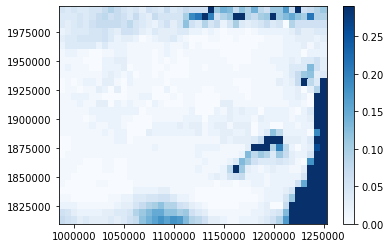

In [73]:
plt.pcolor(new_x,new_y,best_depth,cmap='Blues')
plt.colorbar()

In [112]:
new_x[15:25,15:25]

array([[1078124.87361671, 1084375.33300468, 1090625.04194995,
        1096875.24732686, 1103124.75765377, 1109375.38644837,
        1115625.37982898, 1121875.09472456, 1128124.79288711,
        1134375.17029837],
       [1078124.83093965, 1084375.15991939, 1090624.81896202,
        1096875.28130404, 1103125.13354155, 1109374.73157101,
        1115625.231654  , 1121874.63718537, 1128125.00816984,
        1134375.23732806],
       [1078125.08933526, 1084375.27106494, 1090624.86331542,
        1096875.01064929, 1103124.9579004 , 1109374.63440911,
        1115625.06183486, 1121874.71232354, 1128124.84190983,
        1134374.90757658],
       [1078124.76746931, 1084375.336545  , 1090625.07258305,
        1096875.21915843, 1103124.58678319, 1109374.98960421,
        1115625.0007072 , 1121875.21500624, 1128125.09049236,
        1134374.65102247],
       [1078124.86196509, 1084374.9190339 , 1090624.88012669,
        1096875.23900345, 1103124.90484385, 1109375.12470597,
        1115624.70458046

In [119]:
new_x[0,:]

array([ 984374.81636796,  990624.91868806,  996874.77329756,
       1003125.26839217, 1009374.74466869, 1015624.94243137,
       1021875.20988795, 1028124.91759625, 1034374.95789024,
       1040625.18735588, 1046874.6125125 , 1053125.00259893,
       1059375.00535539, 1065625.35397126, 1071875.38303786,
       1078124.77280204, 1084374.96765541, 1090624.9385405 ,
       1096875.25222821, 1103125.05476514, 1109374.91742782,
       1115625.02672318, 1121875.26135705, 1128125.10572858,
       1134374.93585102, 1140624.98560301, 1146875.0803808 ,
       1153125.24726706, 1159375.1646955 , 1165625.20801239,
       1171875.05539431, 1178125.08193012, 1184374.96553883,
       1190625.08105141, 1196874.8788935 , 1203125.18584886,
       1209374.87408607, 1215625.24222106, 1221875.0341585 ,
       1228124.85575094, 1234375.08097473, 1240625.14375947,
       1246875.06269942, 1253125.10357911])

In [130]:
new_x[::-1,0]

array([984374.67263879, 984374.74968574, 984374.7401953 , 984375.29085328,
       984374.82469904, 984375.150839  , 984375.01594894, 984375.26158661,
       984374.95582737, 984374.73597843, 984375.23435157, 984374.87173729,
       984374.9333147 , 984374.87369825, 984375.13215189, 984374.97621851,
       984375.20632491, 984374.73015686, 984374.85322598, 984375.00014376,
       984374.77670554, 984375.29855133, 984375.15249734, 984374.78291604,
       984374.79759773, 984375.29996274, 984375.20676661, 984374.96401322,
       984375.17199557, 984375.0890664 , 984374.81636796])

In [134]:
x_water

array([1085043.16802717, 1085298.37735641, 1085553.58668564,
       1085808.79601488, 1086064.00534412, 1086319.21467335,
       1086574.42400259, 1086829.63333183, 1087084.84266107,
       1087340.0519903 , 1087595.26131954, 1087850.47064878,
       1088105.67997801, 1088360.88930725, 1088616.09863649,
       1088871.30796572, 1089126.51729496, 1089381.7266242 ,
       1089636.93595344, 1089892.14528267, 1090147.35461191,
       1090402.56394115, 1090657.77327038, 1090912.98259962,
       1091168.19192886, 1091423.40125809, 1091678.61058733,
       1091933.81991657, 1092189.0292458 , 1092444.23857504,
       1092699.44790428, 1092954.65723352, 1093209.86656275,
       1093465.07589199, 1093720.28522123, 1093975.49455046,
       1094230.7038797 , 1094485.91320894, 1094741.12253817,
       1094996.33186741, 1095251.54119665, 1095506.75052589,
       1095761.95985512, 1096017.16918436, 1096272.3785136 ,
       1096527.58784283, 1096782.79717207, 1097038.00650131,
       1097293.21583054,

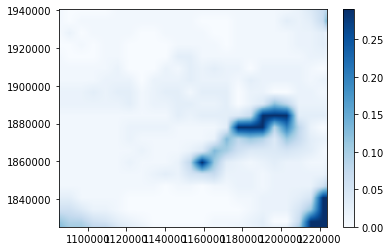

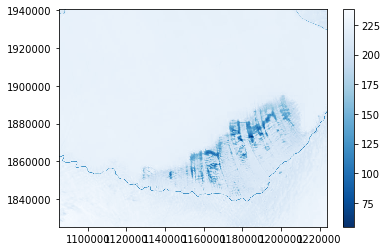

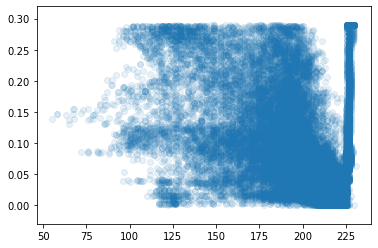

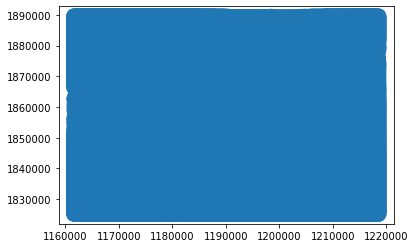

In [157]:
x_water,y_water = np.meshgrid(np.asarray(water['x']),np.asarray(water['y']))

good = ((x_water>950000) & (x_water<1250000) & \
        (y_water>1800000) & (y_water<2000000))

blues = np.asarray(water['Band1'])

from scipy.interpolate import RegularGridInterpolator

f = RegularGridInterpolator((new_y[::-1,0],new_x[0,:],),best_depth[::-1,:])

blues_new = f((y_water,x_water))


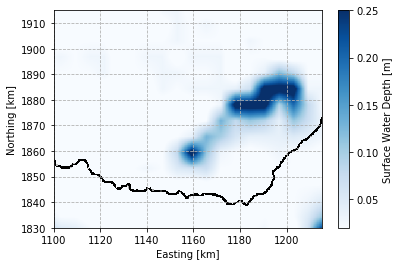

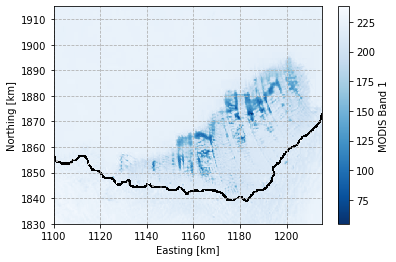

In [196]:
xmin = 1100000/1000
xmax = 1215000/1000
ymin = 1830000/1000
ymax = 1915000/1000


blah=plt.pcolor(x_water[:-100,:-120]/1000,y_water[:-100,:-120]/1000,blues_new[:-100,:-120],cmap='Blues',vmax=0.25,vmin=0.02)
plt.pcolor(np.asarray(water_bounds['x'])/1000,np.asarray(water_bounds['y'])/1000,water_bounds['Band1'],cmap='gray_r',vmax=20)

plt.colorbar(blah).set_label('Surface Water Depth [m]')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.ylabel('Northing [km]')
plt.xlabel('Easting [km]')

plt.grid(linestyle='--')
plt.savefig('Detected_Depth.png',dpi=200)

plt.figure()

blah=plt.pcolor(x_water[:-100,:-120]/1000,y_water[:-100,:-120]/1000,blues[:-100,:-120],cmap='Blues_r')

plt.colorbar(blah).set_label('MODIS Band 1')
plt.pcolor(np.asarray(water_bounds['x'])/1000,np.asarray(water_bounds['y'])/1000,water_bounds['Band1'],cmap='gray_r',vmax=20)

plt.ylabel('Northing [km]')
plt.xlabel('Easting [km]')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.grid(linestyle='--')
plt.savefig('MODIS.png',dpi=200)


# plt.scatter(blues[:-200,300:-110],blues_new[:-200,300:-110],alpha=0.1)

# plt.figure()
# plt.pcolor(x_water[:-200,300:-110],y_water[:-200,300:-110],blues[:-200,300:-110])


In [179]:
water_bounds['Band1'][:]

/Users/mdattler/anaconda3/envs/py3-geos/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0,
  dtype=uint8)

In [91]:
y_water[good].shape

(287202,)

In [161]:
new_z
from scipy import interpolate
x = x_amsr[good]
y = y_amsr[good]
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

1177676.4397410606

In [179]:
tb89V['TB_89V'][redo1,redo2,21].shape

(100,)

In [180]:
tb89V['TB_89V'].shape

(1328, 1264, 365)

In [163]:
x_amsr

array([-2427129.16173121, -2414617.07618836, -2402111.18332776, ...,
        2727413.18795386,  2739906.09274354,  2739907.76188811])